# EDA ON FIFA20 DATASET

## Tasks to be performed


1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that   play at this level?

2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

3. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


## Import basic libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Reading the given fifa20 dataset

In [2]:
data = pd.read_csv('players_20.csv')

## Basic checks

In [3]:
# Checking the Shape and Size of the dataset

print(data.shape)
print(data.size)

(18278, 104)
1900912


#### OBSERVATION:
> There are over 18,000+ Rows and 100+ Columns in the Dataset and 19 lakhs elements in the dataset

In [4]:
# Checking the first 5 Rows of the dataset using head function

pd.set_option('display.max_columns', None) # For displaying all the columns
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## Domain Analysis 
- Name: Name of the player. 
- Age: Age of the player.
- Height: Height of the player in inches (transformed to centimeters in preprocessing).
- Overall: General performance quality and value of the player representing the key positional skills and international reputation rated between 1-99. 
- Potential: Maximum Overall rating expected to be reached by a player in the top of his career rated between 1-99.
- PreferredFoot: Right or Left. Label encoder is applied as 0 for left and 1 for right.
- WeakFoot: Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
- WorkRate: Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This feature is divided into two new features as AttackWorkRate and DefenseWorkRate.
- Position: Position of the players on the pitch which determines their roles and responsibilities in the team. Forward positions in the football and players can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), forward (CF: center forward, RF: right forward, LF: left forward) and winger (RW: right winger, LW: left winger). 

In [5]:
# Displaying the datatypes of the columns

data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18278 non-null  int64  
 1    player_url                  18278 non-null  object 
 2    short_name                  18278 non-null  object 
 3    long_name                   18278 non-null  object 
 4    age                         18278 non-null  int64  
 5    dob                         18278 non-null  object 
 6    height_cm                   18278 non-null  int64  
 7    weight_kg                   18278 non-null  int64  
 8    nationality                 18278 non-null  object 
 9    club                        18278 non-null  object 
 10   overall                     18278 non-null  int64  
 11   potential                   18278 non-null  int64  
 12   value_eur                   18278 non-null  int64  
 13   wage_eur      

#### OBSERVATION:

From the above line we got the data types of our features.

* data types: float64(16), int64(45), object(43)

We must note that we need to deal with object data types as numeric data is preferred for training models well.

The following columns: release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb has missing values

In [6]:
# Basic Statistic of the Dataset

data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [7]:
data.describe(include='O')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality          club player_positions  \
count        18278       18278       18278         18278            18278   
unique       18218        6142         162           698              643   
top     Liam Kelly  1992-02-29     England  FC Barcelona               CB   
freq             3         113        1667            33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Sassuolo  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

## Exploratory Data Analysis

###  Univariate Analysis

In [8]:
# Displaying the distribution of the following features

data_age=data[['age','height_cm','weight_kg']]

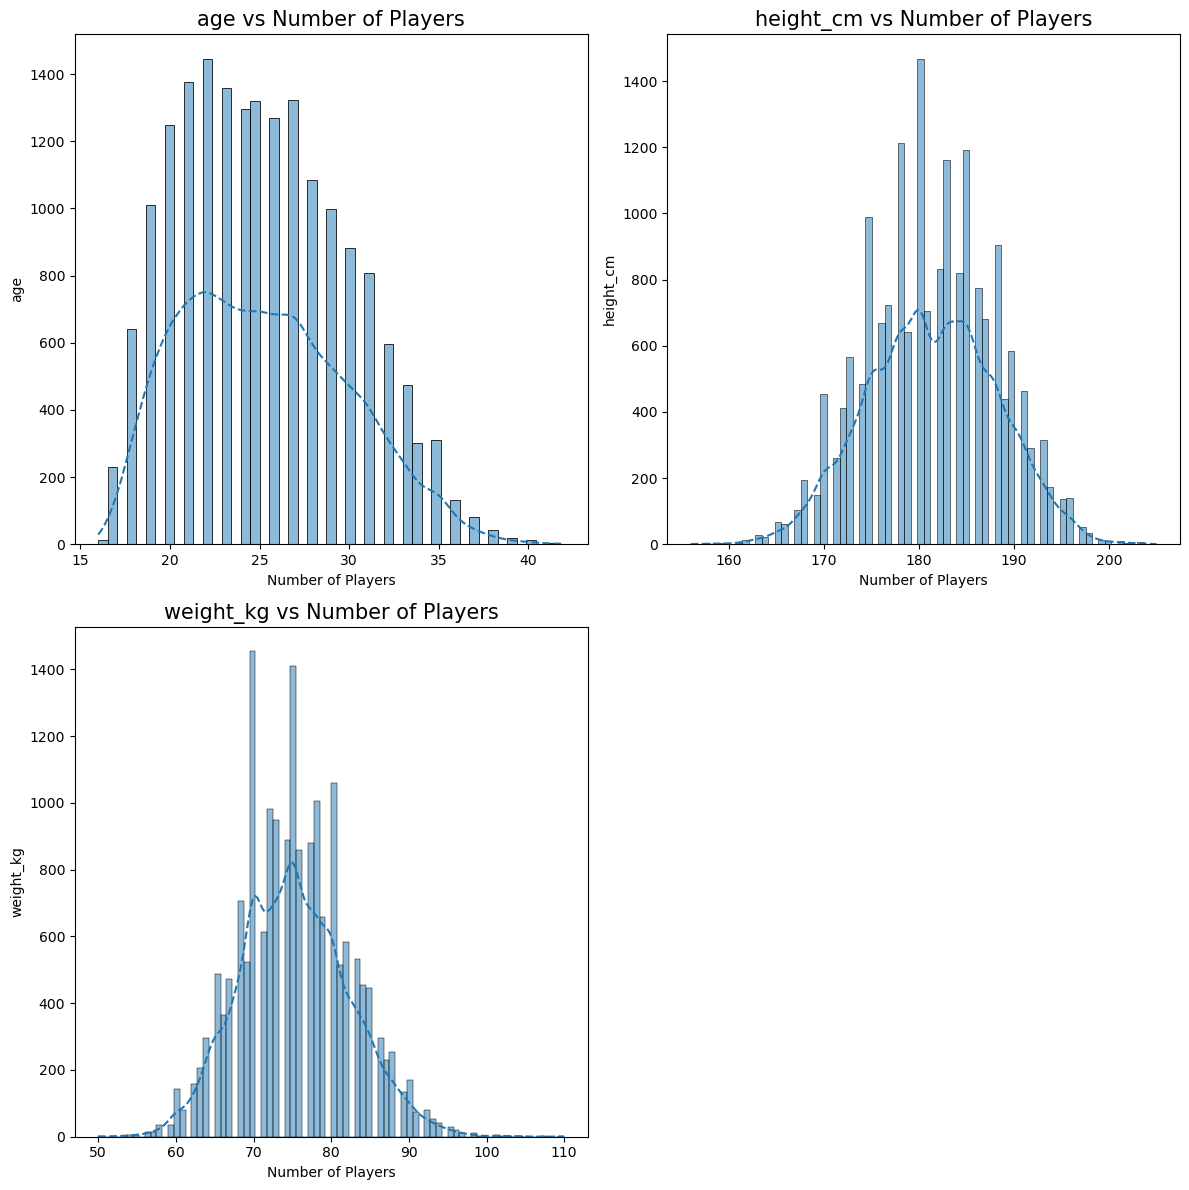

In [9]:
# Displaying the distribution of the following features
plt.figure(figsize=(12,12),facecolor='white', dpi=100)
plotnumber= 1

for column in data_age:
    if plotnumber <=10:
        
        ax= plt.subplot(2,2,plotnumber)
        sns.histplot(x=data_age[column],kde=True, line_kws= {'linestyle': 'dashed'})
        
        plt.xlabel('Number of Players',fontsize=10)
        plt.ylabel(column,fontsize=10)
        plt.title('{} vs Number of Players'.format(column),fontsize=15)
    plotnumber+=1
plt.tight_layout()


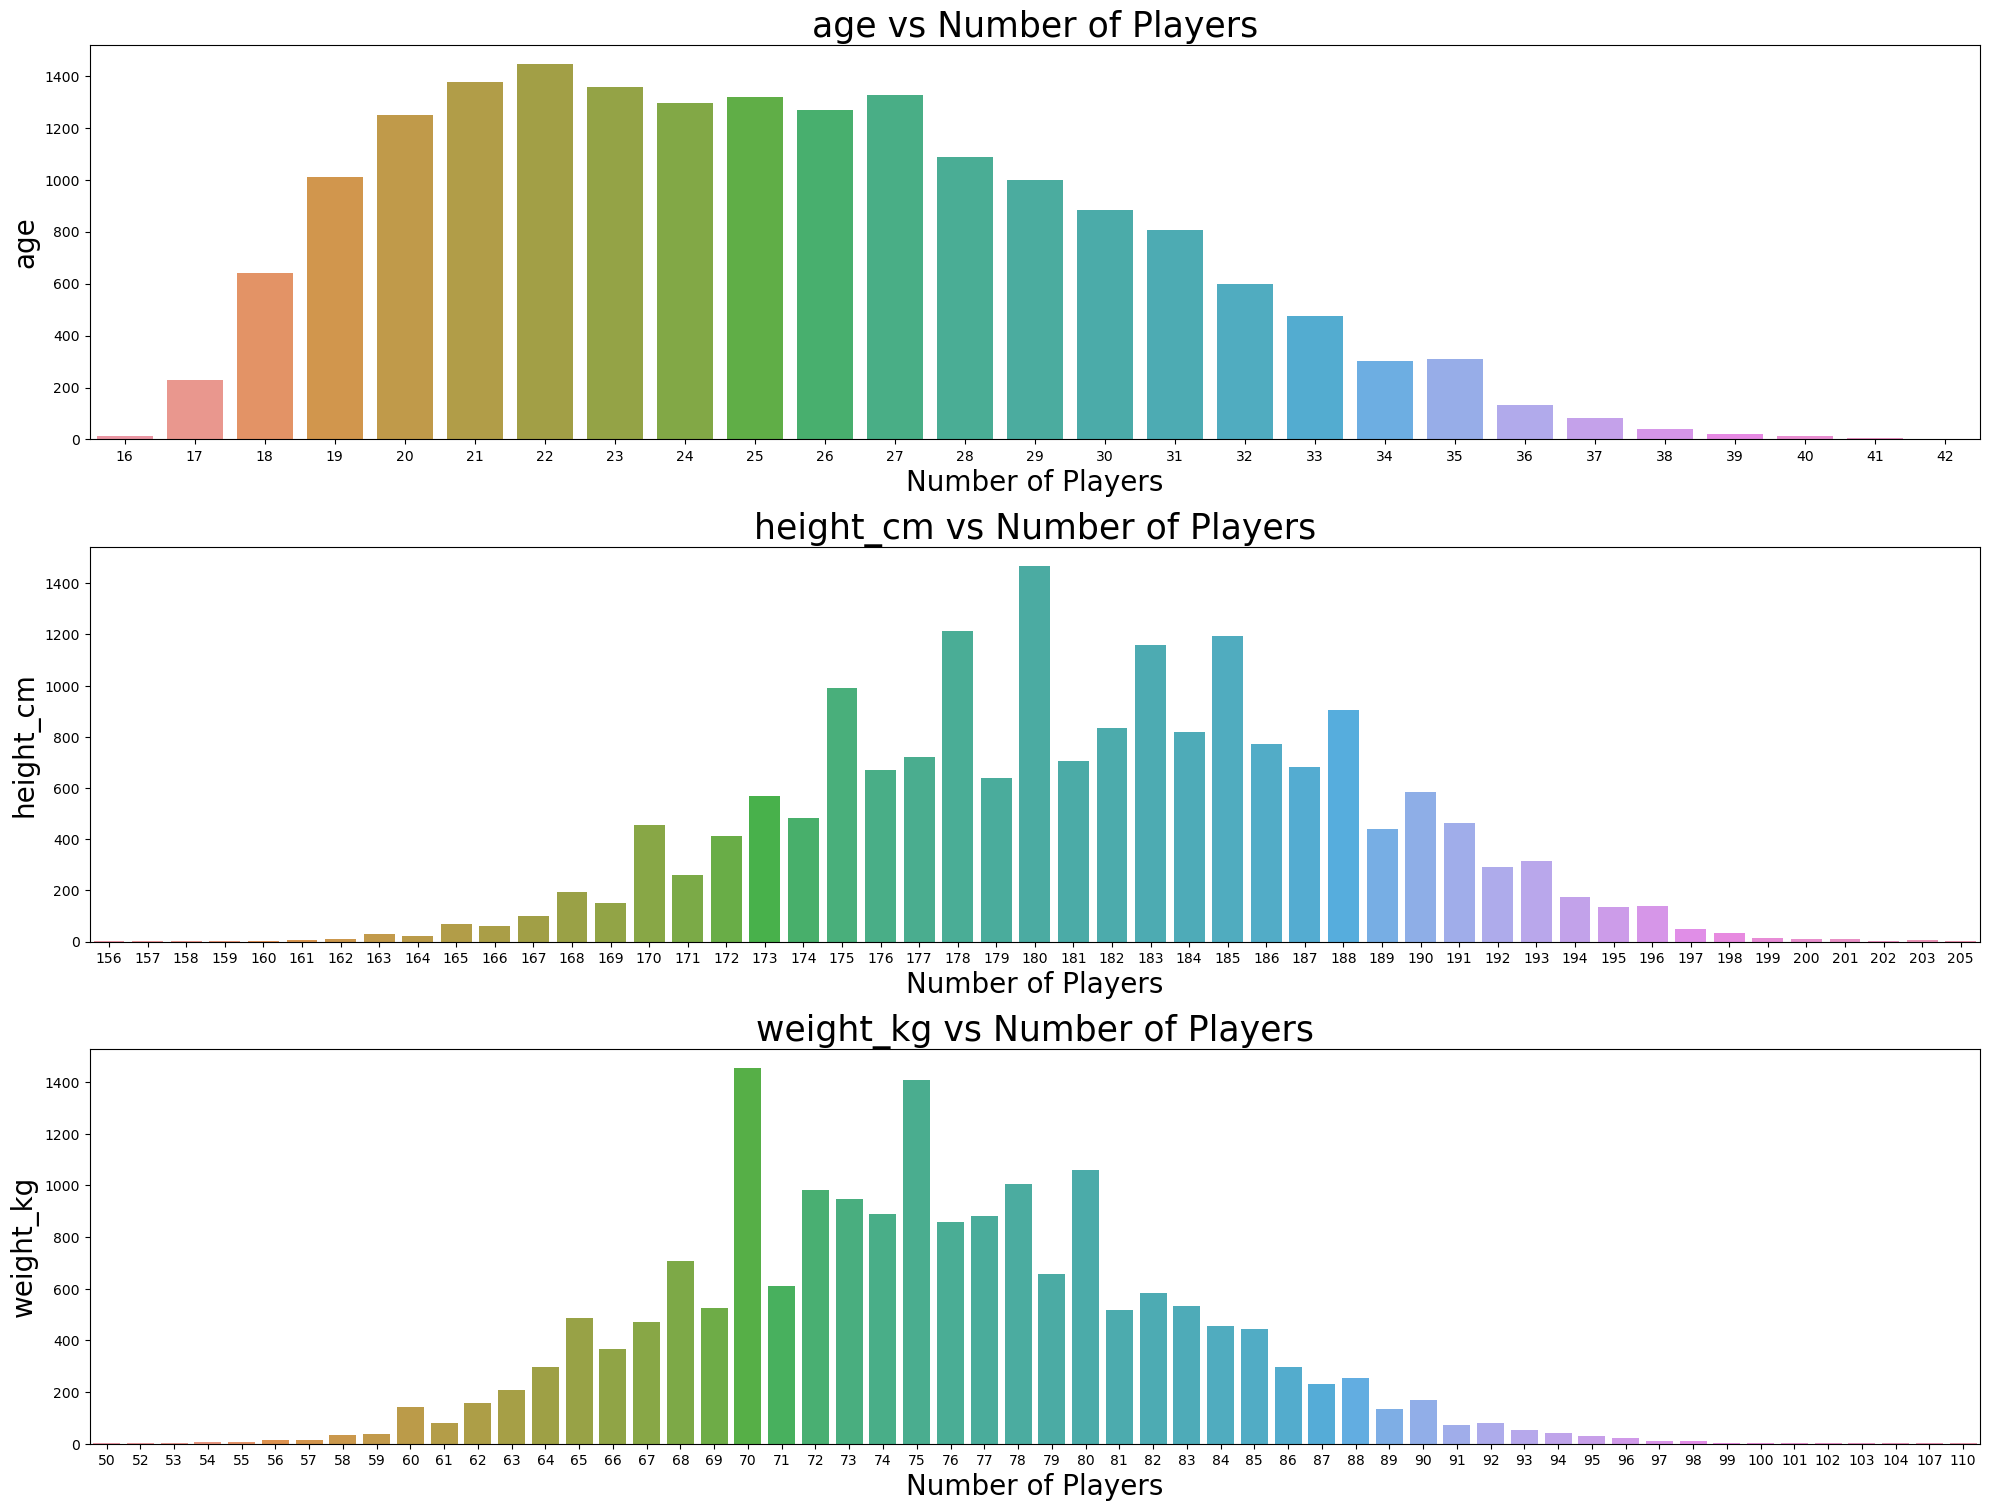

In [10]:
# Displaying the count of the following features

plt.figure(figsize=(20,100),facecolor='white',dpi=100)
plotnumber= 1

for column in data_age:
    if plotnumber <=20:
        
        ax= plt.subplot(20,1,plotnumber)
        sns.countplot(x=data_age[column],data=data_age)
        
        plt.xlabel('Number of Players',fontsize=20)
        plt.ylabel(column,fontsize=20)
        plt.title('{} vs Number of Players'.format(column),fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

#### OBSERVATION:

> Most of the players are between age 21 to 27. There is heavy decline in the numbers of players after 35 years of age. There seems to have only six players in 41 and 42 age category. Three out of them are Goalkeepeers.

> Most of the players' height ranges between 175cm to 185 cm. Mean height of player is 181 cm. Shortest height of player in the game is 156cm and tallest player is 205cm.

> Maximum number of players lie in the weight range of 65 kg to 85 kg and the Mean weight of the players is 75 kg.


### Nationality of the Players

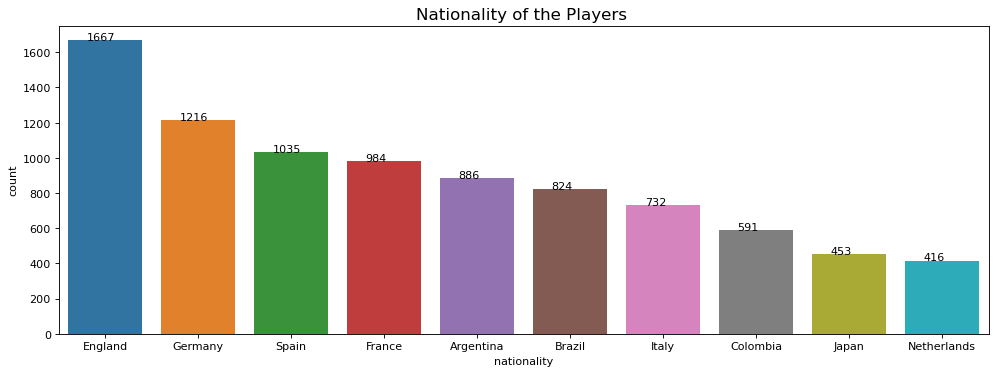

In [11]:
plt.figure(figsize=(15,5),facecolor='white',dpi=80)

ax=sns.countplot(x='nationality',order=data.nationality.value_counts().iloc[:10].index,data=data)
plt.title('Nationality of the Players ',fontsize=15)

for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.01))

#### OBSERVATION: 

 England contributes the Most Playeers in Fifa 20 which is close to 10% of the total data.
 Germany and Spain are the 2nd and 3rd Respectively. 
 
 #### Top 10 Countries contributing Number of players:
  1. England    -- 1667
  2. Germany    -- 1216
  3. Spain      -- 1035
  4. France     --  984
  5. Argentina   -- 886
  6. Brazil      -- 824
  7. Italy       -- 732
  8. Colombia    -- 591
  9. Japan       -- 453
  10. Netherlands -- 416

### Overall Rating of the Players

Text(0.5, 1.0, 'Overall Rating of the Players')

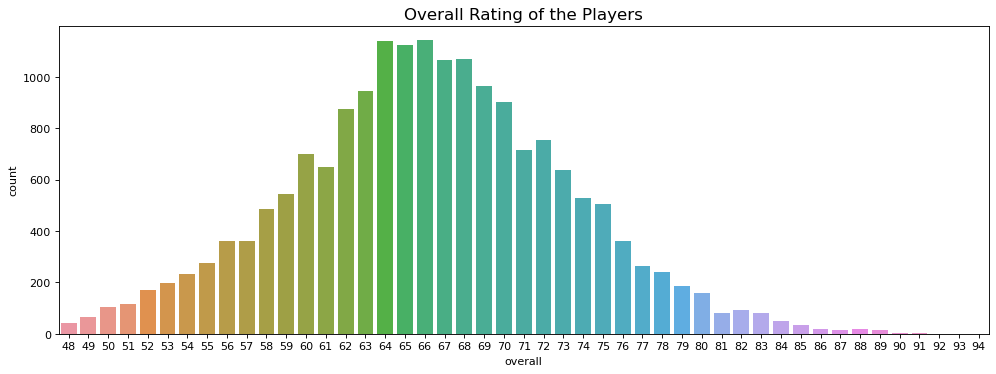

In [12]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.countplot(x=data['overall'])
plt.title('Overall Rating of the Players',fontsize=15)

In [13]:
print('Min  :  ',data['overall'].min())
print('Mean :  ',data['overall'].mean())
print('Max  :  ',data['overall'].max())

Min  :   48
Mean :   66.24499398183609
Max  :   94


#### Top 10 Players with highest Overall Rating

In [14]:
data[['short_name','overall']].sort_values('overall',ascending=False).head(10)

short_name  overall
0           L. Messi       94
1  Cristiano Ronaldo       93
2          Neymar Jr       92
3           J. Oblak       91
4          E. Hazard       91
5       K. De Bruyne       91
6      M. ter Stegen       90
7        V. van Dijk       90
8          L. Modrić       90
9           M. Salah       90

#### OBSERVATION :

> Most of the players fall between 60 to 70 overall rating. There is considerable decline in number after 70. A very few players fall above 85 overall rating.

> L.Messi has the highest overall rating

### Potential of the Players

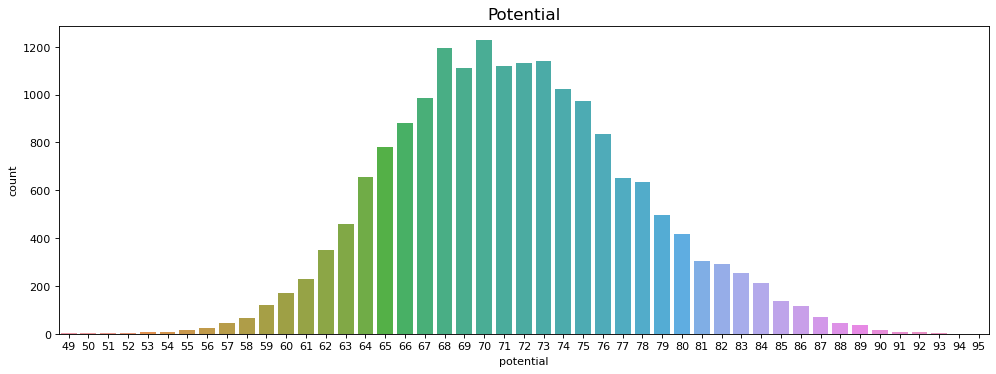

In [15]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.countplot(x= data['potential'])
plt.title('Potential',fontsize=15)
plt.show()

### Top 10 Players with highest Potential

In [16]:
data[['short_name','potential']].sort_values('potential',ascending=False).head(10)

short_name  potential
10           K. Mbappé         95
0             L. Messi         94
6        M. ter Stegen         93
73          M. de Ligt         93
1    Cristiano Ronaldo         93
411         João Félix         93
3             J. Oblak         93
74       G. Donnarumma         92
108          J. Sancho         92
109         K. Havertz         92

#### OBSERVATION: 
> Most of the players are expected to reach potential of around 70. There seems to have steady growth in potential till 70 and thereafter the graph declines. A few players are expected to show potential of above 85.

> K. Mbappe is expected reach overall rating of 95 surpassing L. Messi

### Value in Euro of the Players

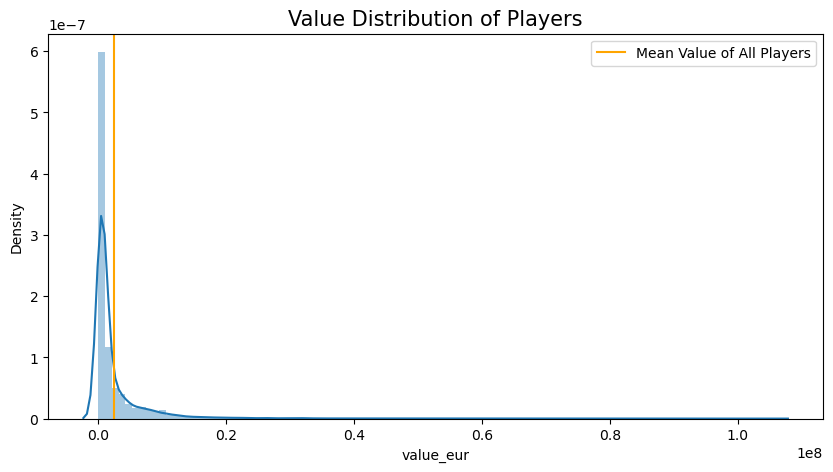

In [17]:
plt.figure(figsize = (10, 5), dpi = 100)

plt.title('Value Distribution of Players',fontsize=15)
sns.distplot(a = data['value_eur'], kde = True, bins = 100)
plt.axvline(x = np.mean(data['value_eur']), c = 'orange', label = 'Mean Value of All Players')
plt.legend()
plt.show()

### Value in Euro of Top 10 Players

In [18]:
data_value_top=data[['short_name', 'value_eur']].sort_values(by='value_eur',ascending=False).head(10).reset_index(drop=True)
data_value_top.index+=1
data_value_top

short_name  value_eur
1      Neymar Jr  105500000
2       L. Messi   95500000
3      K. Mbappé   93500000
4   K. De Bruyne   90000000
5      E. Hazard   90000000
6        H. Kane   83000000
7       M. Salah   80500000
8    V. van Dijk   78000000
9       J. Oblak   77500000
10     P. Dybala   76500000

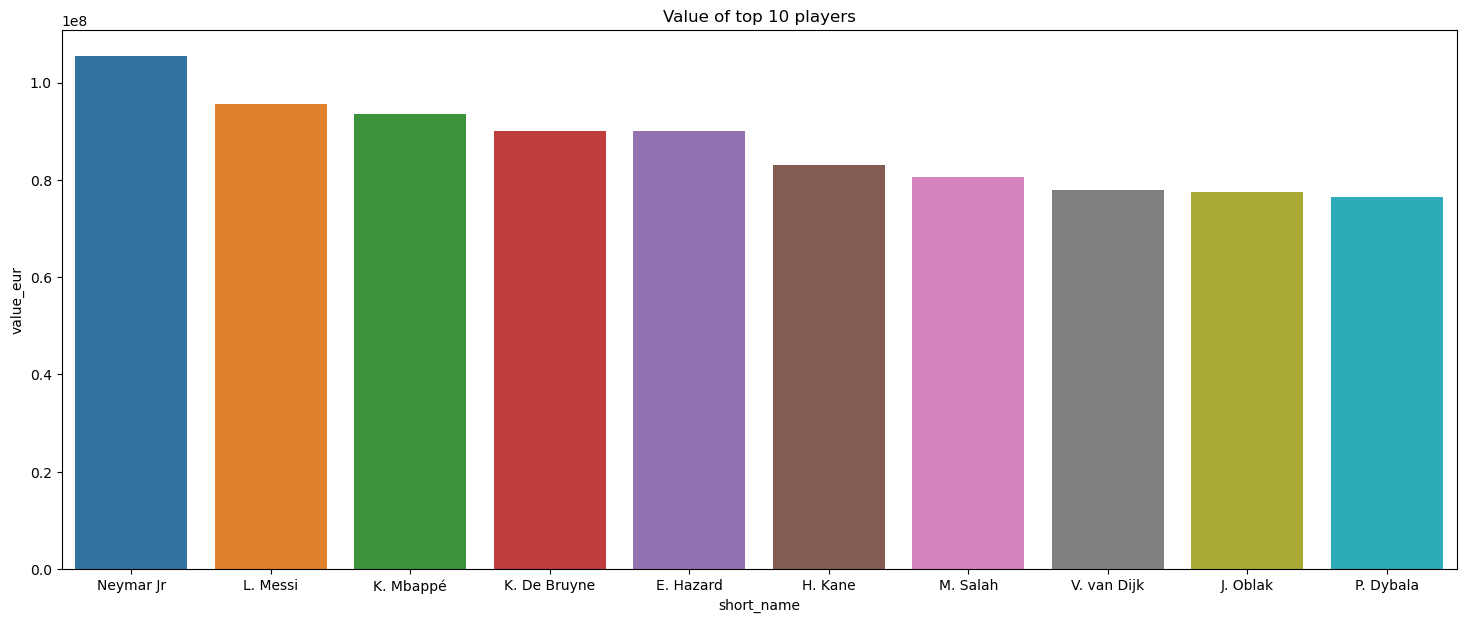

In [19]:
plt.figure(figsize=(18, 7), dpi = 100)

sns.barplot(x='short_name', y='value_eur',data=data_value_top).set_title('Value of top 10 players')
plt.show()

#### OBSERVATION:
The most valuable player is Neymar and second most valuable player is L.Messi
Most of the players have value 10 million Euros. The density graph shows it concentrated around 2-3 million Euros.

### Wage in Euro of Top 10 players

In [20]:
data_wages_top=data[['short_name', 'wage_eur']].sort_values(by='wage_eur',ascending=False).head(10).reset_index(drop=True)
data_wages_top.index+=1
data_wages_top

short_name  wage_eur
1            L. Messi    565000
2           E. Hazard    470000
3   Cristiano Ronaldo    405000
4        K. De Bruyne    370000
5        A. Griezmann    370000
6           L. Suárez    355000
7           L. Modrić    340000
8            T. Kroos    330000
9           S. Agüero    300000
10    Sergio Busquets    300000

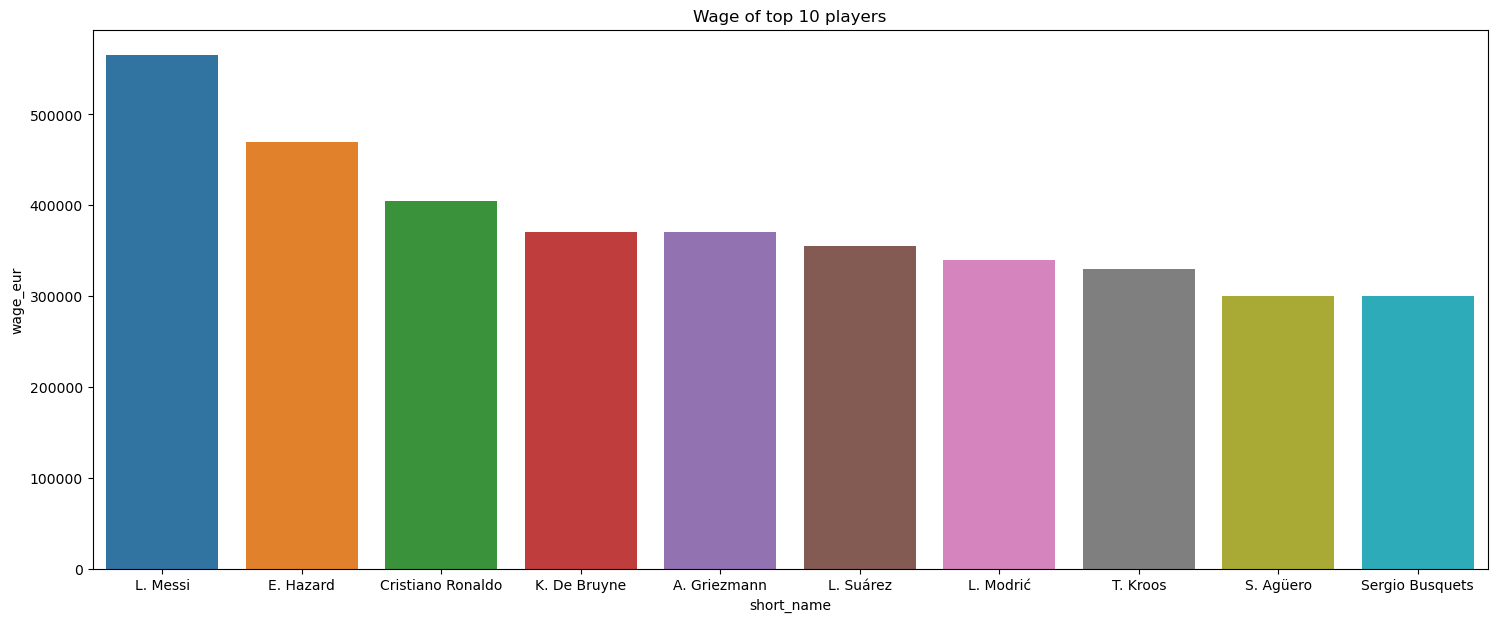

In [21]:
plt.figure(figsize=(18, 7), dpi = 100)

sns.barplot(x='short_name', y='wage_eur', data=data_wages_top).set_title('Wage of top 10 players')
plt.show()

#### OBSERVATION:
The most salaried player is L. Messi

### Peferred Foot of Most Players`

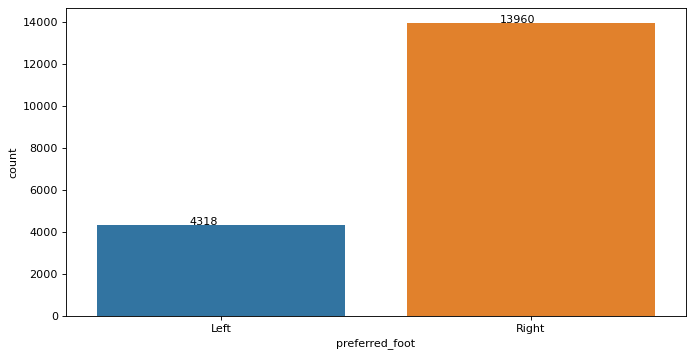

In [22]:
plt.figure(figsize=(10,5), dpi = 80)

ax=sns.countplot(x = data['preferred_foot'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.show()

#### Observation:
Most players like to use their Right Foot compared to Left Foot during the game

### International Reputation of the Players

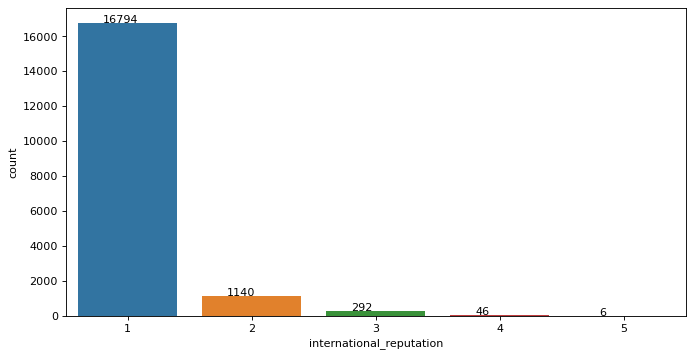

In [23]:
plt.figure(figsize=(10,5), dpi = 80)

ax=sns.countplot(x = data['international_reputation'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.01))
plt.show()

### Top 6 International Reputated Players

In [24]:
data[['short_name','international_reputation']].sort_values('international_reputation',ascending=False).head(6).reset_index(drop=True)

short_name  international_reputation
0           L. Messi                         5
1          L. Suárez                         5
2     Z. Ibrahimović                         5
3  Cristiano Ronaldo                         5
4           M. Neuer                         5
5          Neymar Jr                         5

#### OBSERVATION:
Top 6 International reputated players are:
L. Messi, L. Suárez, Z. Ibrahimović, Cristiano Ronaldo, M. Neuer, Neymar Jr

### Weak Foot and Skill Moves

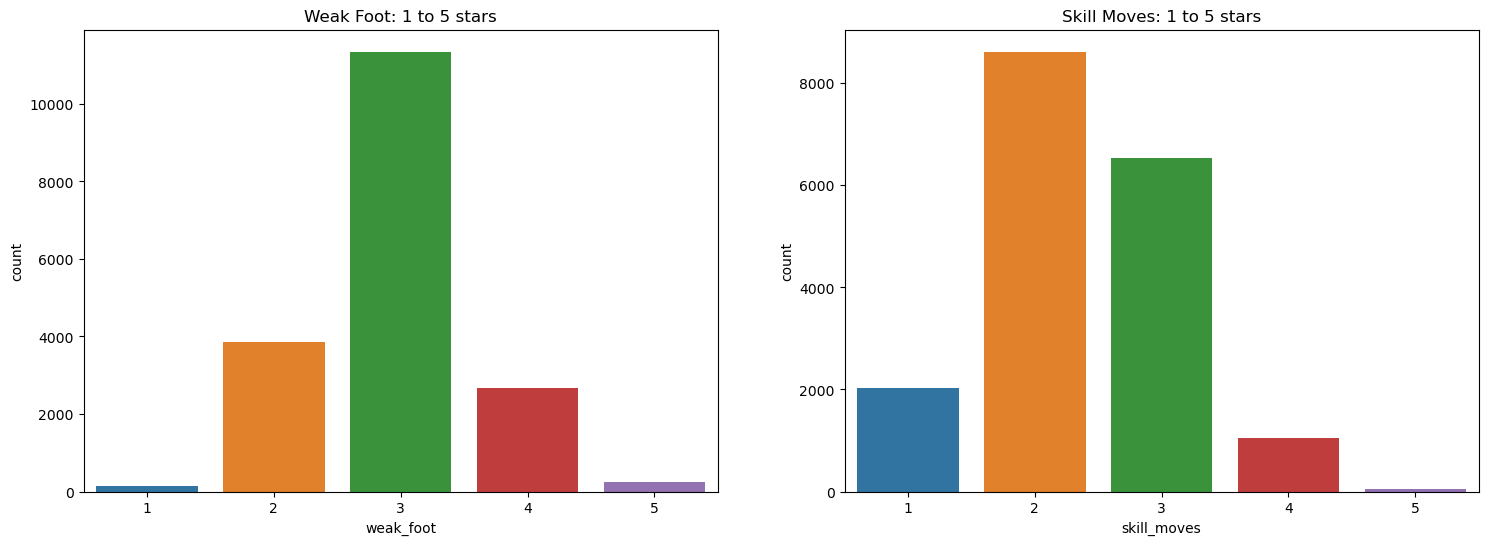

In [25]:
fig, ax = plt.subplots(1,2, figsize=(18, 6),dpi=100)

sns.countplot(x='weak_foot', data=data, ax=ax[0]).set(title='Weak Foot: 1 to 5 stars')
sns.countplot(x='skill_moves', data=data, ax=ax[1]).set(title='Skill Moves: 1 to 5 stars')
plt.show()

In [26]:
data['weak_foot'].value_counts()

3    11347
2     3865
4     2666
5      245
1      155
Name: weak_foot, dtype: int64

#### OBSERVATION:
> Most of the players are rated 3 Stars in Weak Foot Ratings. There are only 245 players have 5 star Weak Foot ratings.

> In Skill Moves Rating, most of the players fall in 2nd and 3rd Stars (close to 80%). Only 49 players have 5 Star skill moves ratings.

### Work Rate of the Players

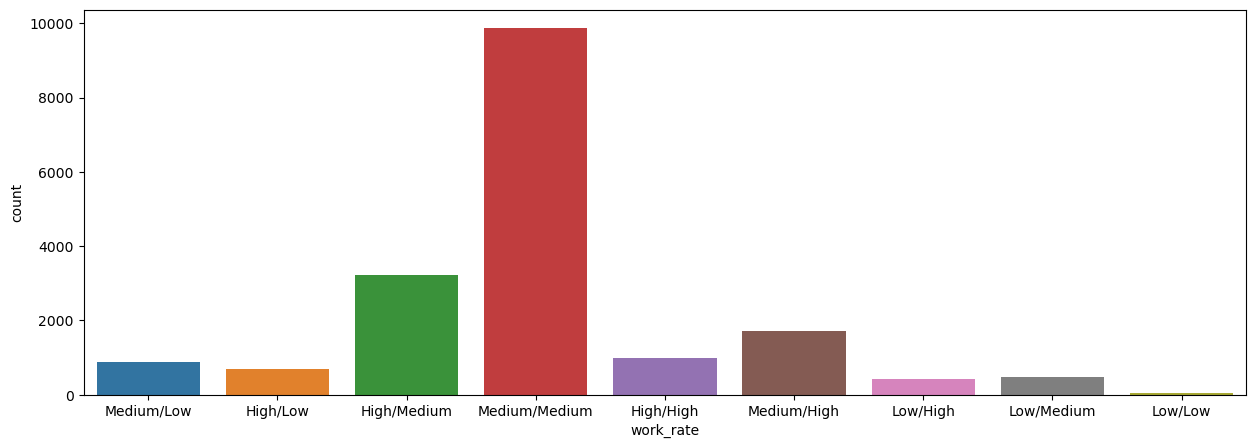

In [27]:
plt.figure(figsize=(15,5), dpi = 100)

sns.countplot(x = data['work_rate'])
plt.show()

#### OBSERVATION:
Most of the players uses Medium attack and defence work rate.

### Team Position

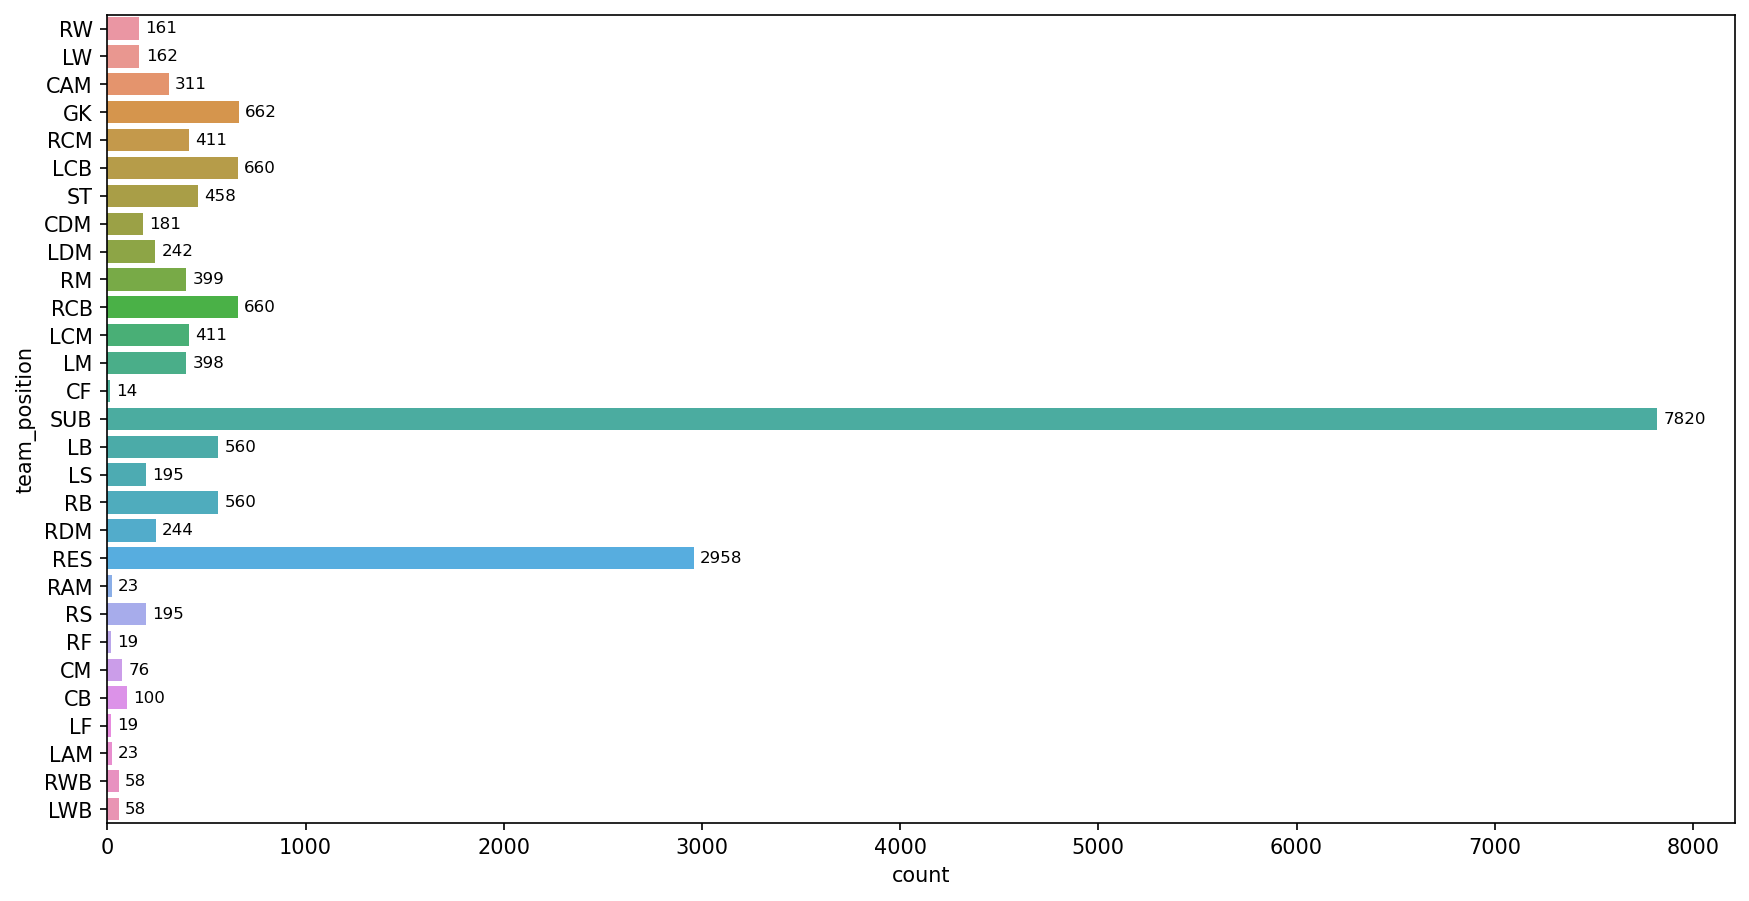

In [28]:
plt.figure(figsize=(14, 7), dpi = 150)

ax = sns.countplot(y='team_position', data=data)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=8)

#### OBSERVATION:
    
Most of the players are Substitutes(SUB), their number is 7820. 
Then there are Reserved 2958 players (RES)

There are 662 Goalkeepers in the Dataset.

Number of Attackers
>RW(161), LW(162), ST(458), RS(195), LS(195), CF(14), RF(19), LF(19) are all attackers and They are 1,223 in Total

Number of Midfielders
>CAM(311), RCM(411), CDM(181), LDM(242), RM(399), LM(398), LCM(411), RDM(244), RAM(23), CM(76), LAM(23), are all midfielders. They are 2,719 in Total

Number of Defenders
>LCB(660), RCB(660), LB(560), RB(560), CB(100), RWB(58), LWB(58) are all Midfielders and their total Number is 2,656

### Skills of the Players

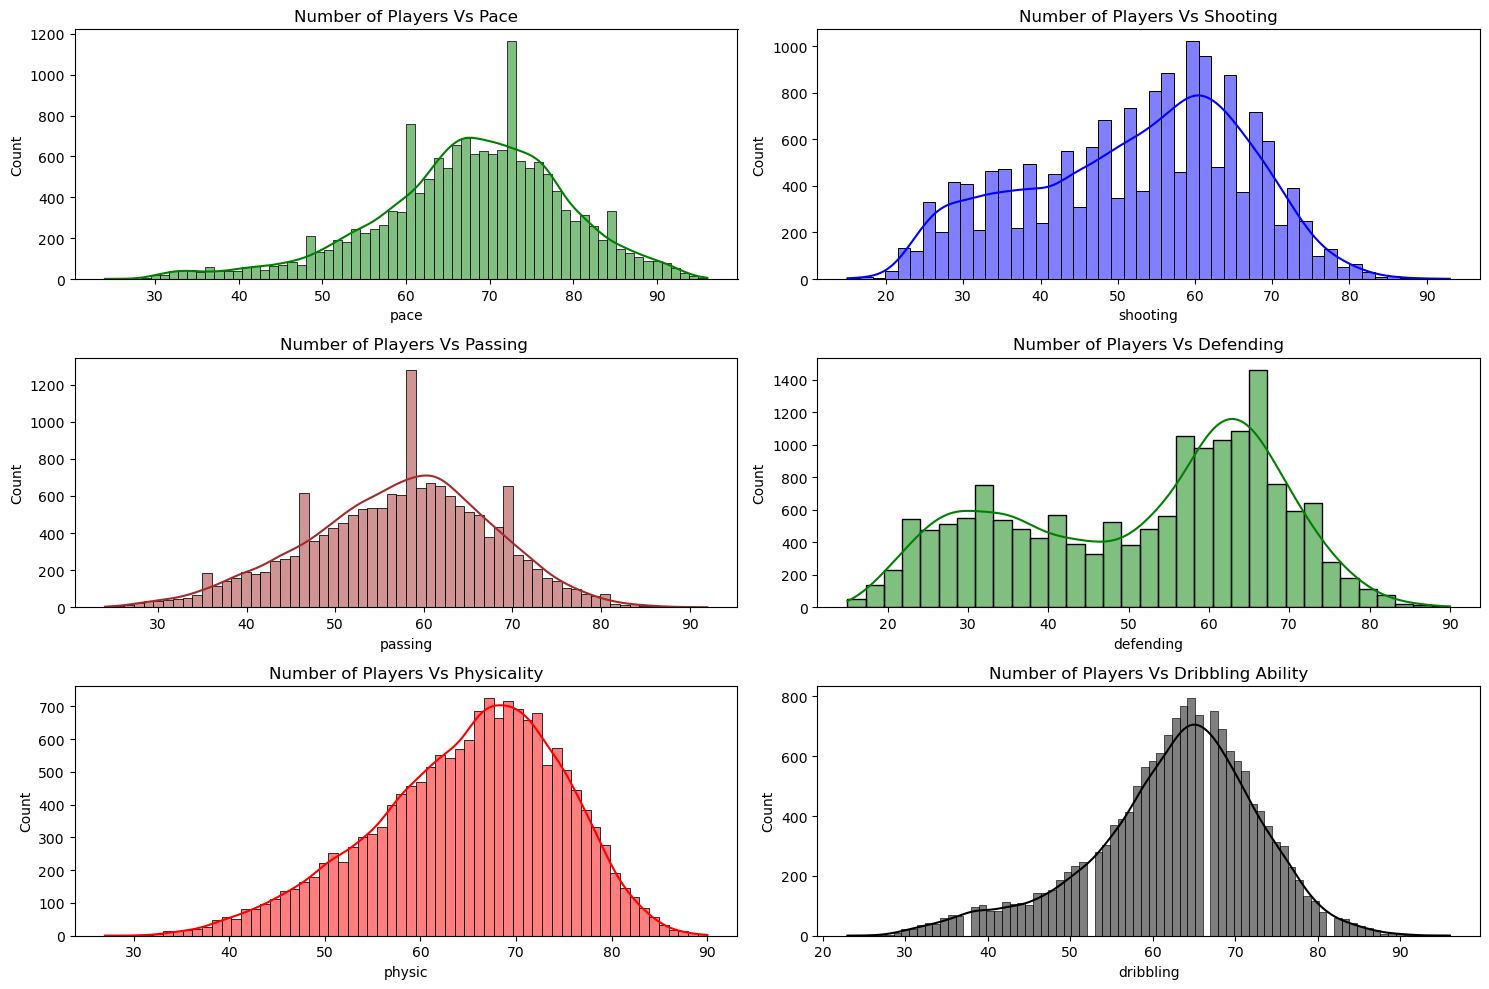

In [29]:
fig,axs = plt.subplots(3,2, figsize = (15,10), dpi=100)

sns.histplot(data=data, x="pace", kde=True, color="green", ax=axs[0, 0]).set(title="Number of Players Vs Pace")
sns.histplot(data=data, x="shooting", kde=True, color="blue", ax=axs[0, 1]).set(title="Number of Players Vs Shooting")
sns.histplot(data=data, x="passing", kde=True, color="brown", ax=axs[1, 0]).set(title="Number of Players Vs Passing ")
sns.histplot(data=data, x="defending", kde=True, color="green", ax=axs[1, 1]).set(title="Number of Players Vs Defending")
sns.histplot(data=data, x="physic", kde=True, color="red", ax=axs[2, 0]).set(title="Number of Players Vs Physicality")
sns.histplot(data=data, x="dribbling", kde=True, color="black", ax=axs[2, 1]).set(title="Number of Players Vs Dribbling Ability")
fig.tight_layout()

- Number of Players Vs Pace
>Most of the players fall wthin 65 to 75 pace ratings. Number of players decline after 75.

- Number of Players Vs Shooting Ability
>Most of the players fall within 55 to 65 Shooting ability. There is steep decline in numbers after 65. A few players have been given shooting ability ratings above 80.

- Number of Players Vs Passing Ability
>Most of the players have passing ability of 60. 

- Number of Players Vs Defending Ability
> After the steady rise from 20 to 30, there seems to be decline in upto 55 and again after 55, there is steep rise. Most of the players fall between 55 to 75 ratings.

- Number of Players Vs Physicality (Strength and Stamina)
> Most of the players have physicality of around 70. With the steady rise in the count from 40 to 70, it falls steeply after 70. Their are veru less players with  physical ability of more than 85. 

- Number of Players Vs Dribbling ability
> Most of the players have Dribbling ability between 60 and 70 as shown in the graph.


### Attacking Skills of the Players

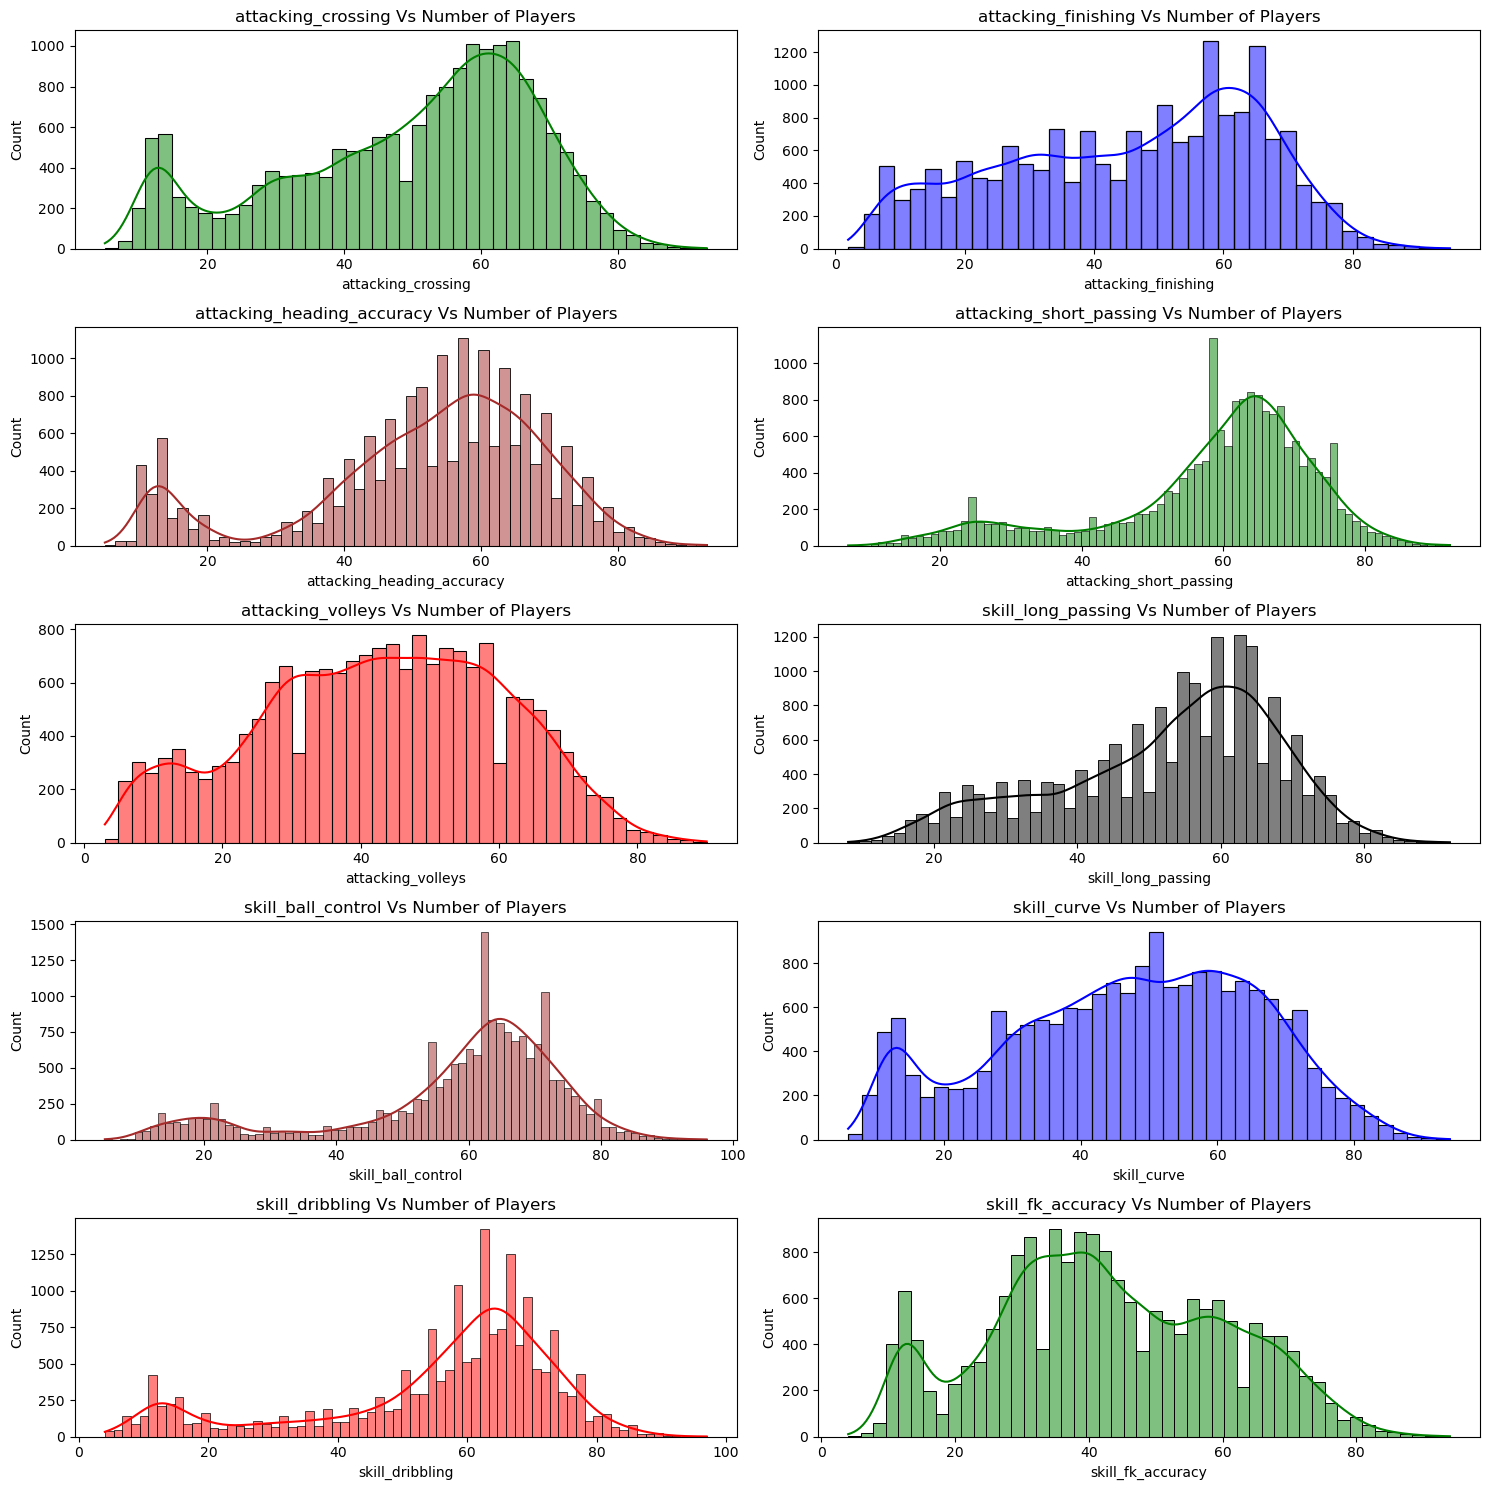

In [30]:
fig,axs = plt.subplots(5,2, figsize = (15,15), dpi=100)

sns.histplot(data=data, x="attacking_crossing", kde=True, color="green",ax=axs[0, 0]).set(title="attacking_crossing Vs Number of Players")
sns.histplot(data=data, x="attacking_finishing", kde=True, color="blue",ax=axs[0, 1]).set(title="attacking_finishing Vs Number of Players")
sns.histplot(data=data, x="attacking_heading_accuracy", kde=True, color="brown",ax=axs[1, 0]).set(title="attacking_heading_accuracy Vs Number of Players")
sns.histplot(data=data, x="attacking_short_passing", kde=True, color="green",ax=axs[1, 1]).set(title="attacking_short_passing Vs Number of Players")
sns.histplot(data=data, x="attacking_volleys", kde=True, color="red",ax=axs[2, 0]).set(title="attacking_volleys Vs Number of Players")
sns.histplot(data=data, x="skill_long_passing", kde=True, color="black",ax=axs[2, 1]).set(title="skill_long_passing Vs Number of Players")
sns.histplot(data=data, x="skill_ball_control", kde=True, color="brown",ax=axs[3, 0]).set(title="skill_ball_control Vs Number of Players")
sns.histplot(data=data, x="skill_curve", kde=True, color="blue",ax=axs[3, 1]).set(title="skill_curve Vs Number of Players")
sns.histplot(data=data, x="skill_dribbling", kde=True, color="red",ax=axs[4, 0]).set(title="skill_dribbling Vs Number of Players")
sns.histplot(data=data, x="skill_fk_accuracy", kde=True, color="green",ax=axs[4, 1]).set(title="skill_fk_accuracy Vs Number of Players")
plt.tight_layout()

### Movement Skills of the Players

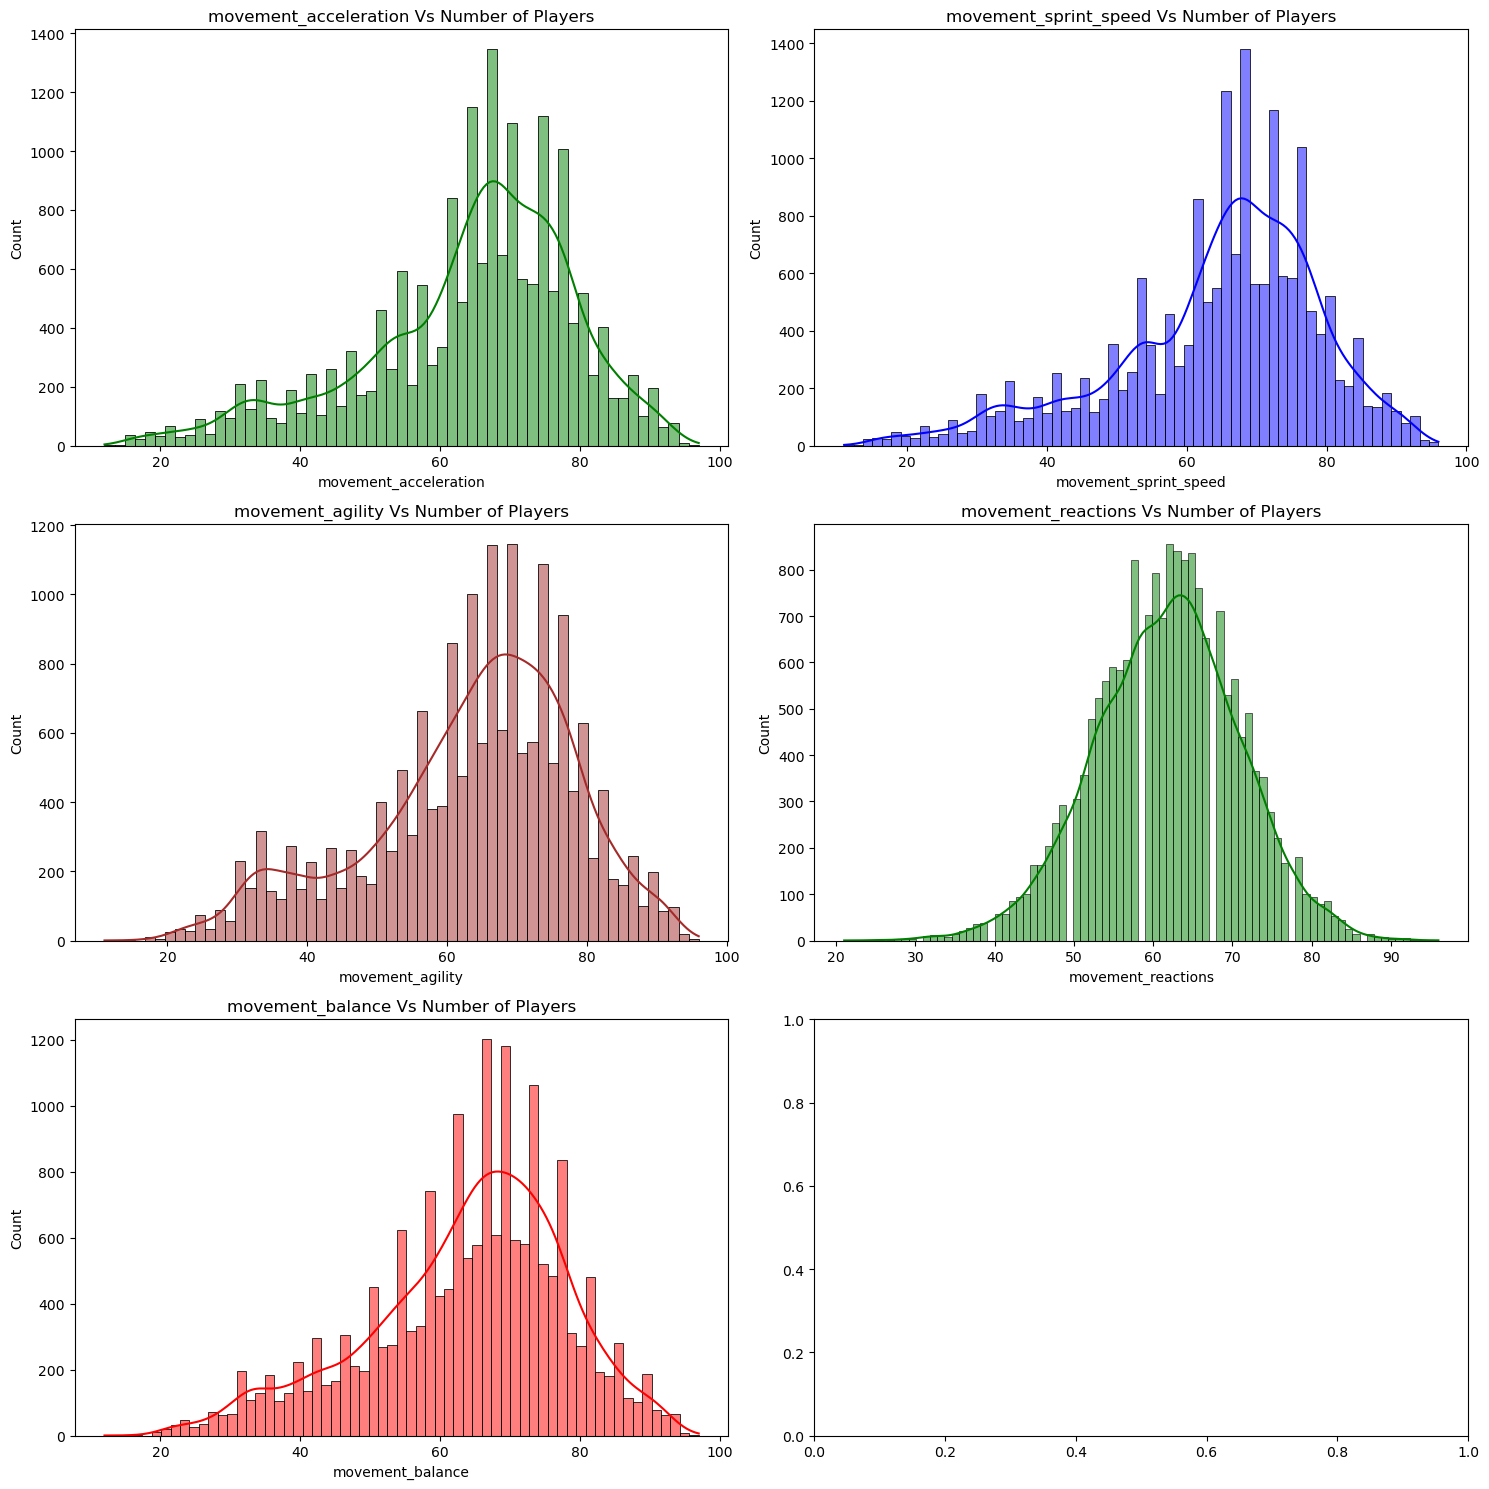

In [31]:
fig,axs = plt.subplots(3,2, figsize = (15,15), dpi=100)

sns.histplot(data=data, x="movement_acceleration", kde=True, color="green",ax=axs[0, 0]).set(title="movement_acceleration Vs Number of Players")
sns.histplot(data=data, x="movement_sprint_speed", kde=True, color="blue",ax=axs[0, 1]).set(title="movement_sprint_speed Vs Number of Players")
sns.histplot(data=data, x="movement_agility", kde=True, color="brown",ax=axs[1, 0]).set(title="movement_agility Vs Number of Players")
sns.histplot(data=data, x="movement_reactions", kde=True, color="green",ax=axs[1, 1]).set(title="movement_reactions Vs Number of Players")
sns.histplot(data=data, x="movement_balance", kde=True, color="red",ax=axs[2, 0]).set(title="movement_balance Vs Number of Players")
plt.tight_layout()

### Power Skills of the Players

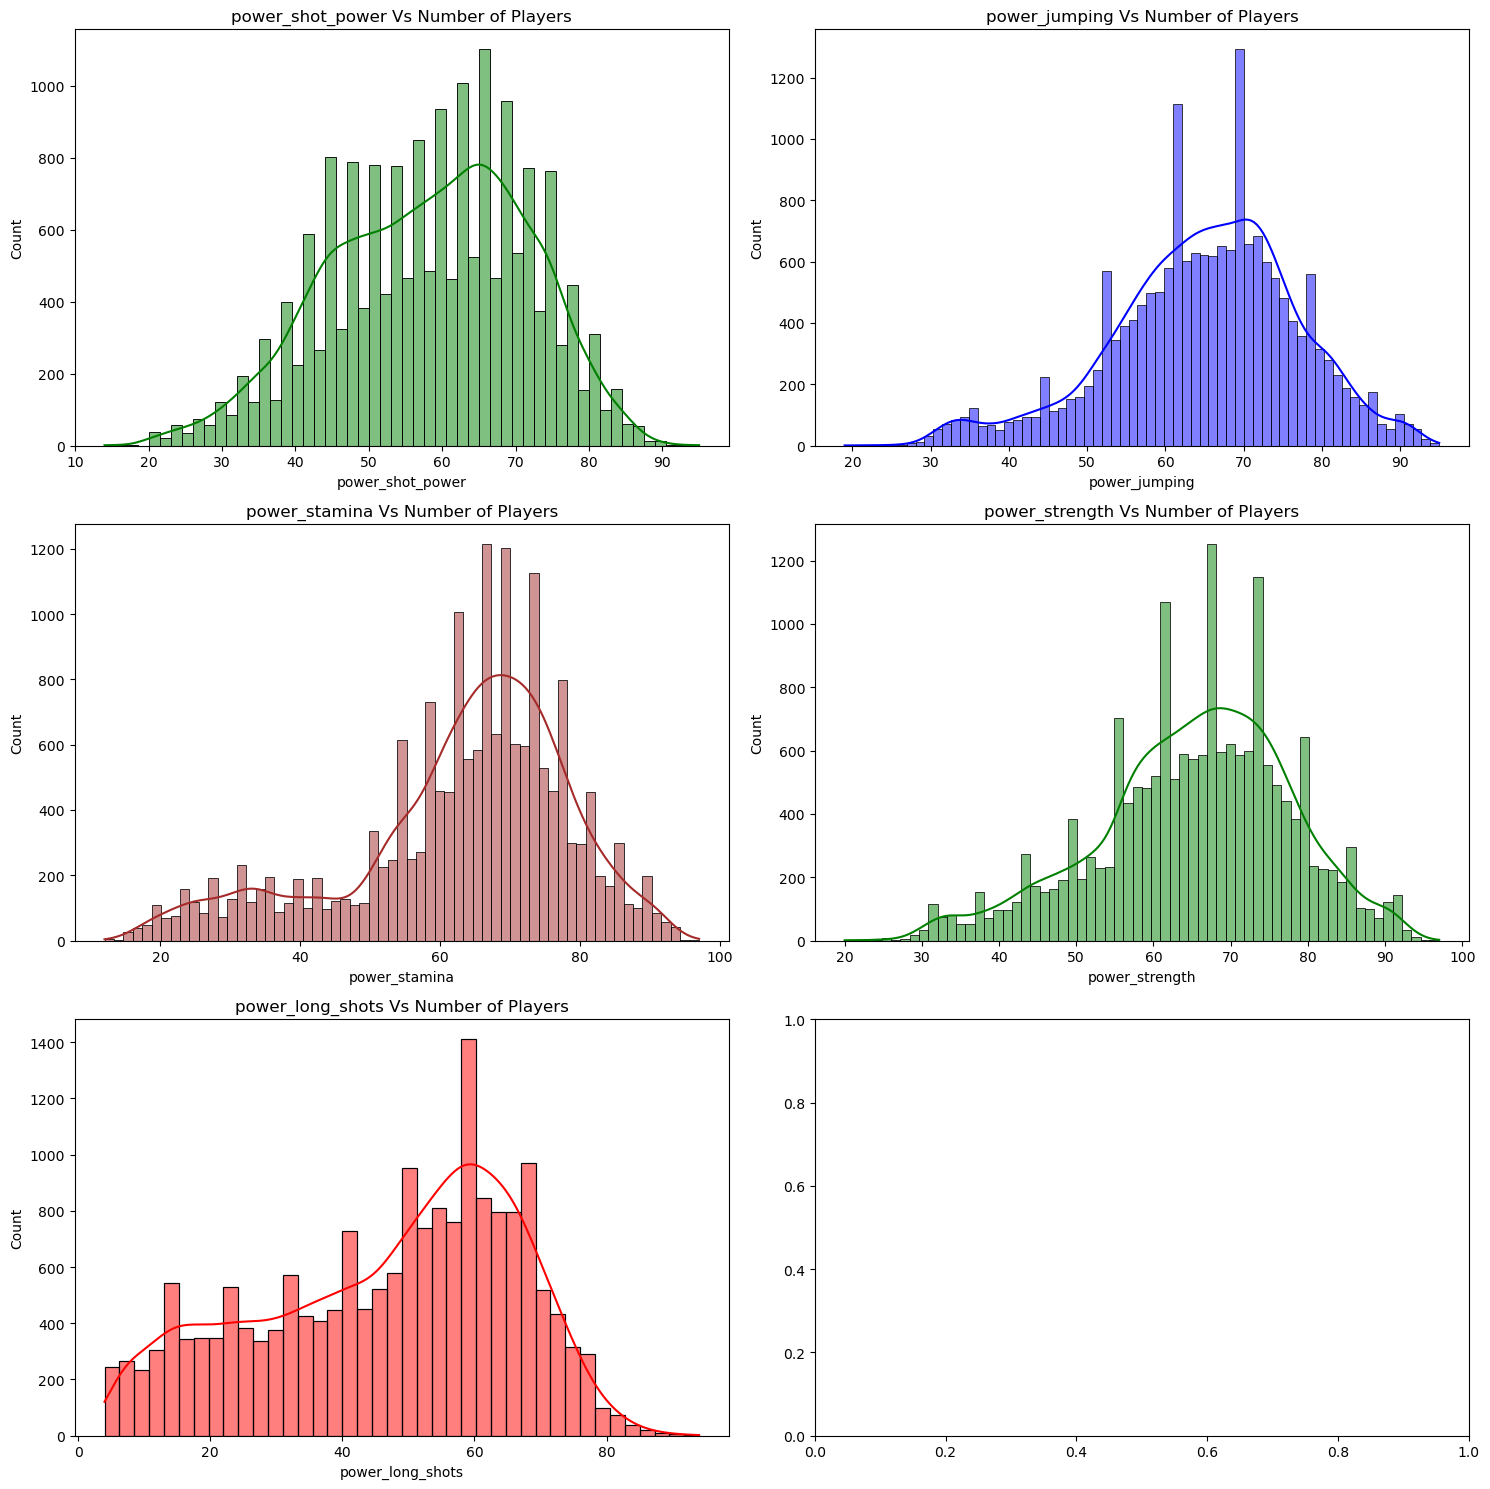

In [32]:
fig,axs = plt.subplots(3,2, figsize = (15,15), dpi=100)

sns.histplot(data=data, x="power_shot_power", kde=True, color="green",ax=axs[0, 0]).set(title="power_shot_power Vs Number of Players")
sns.histplot(data=data, x="power_jumping", kde=True, color="blue",ax=axs[0, 1]).set(title="power_jumping Vs Number of Players")
sns.histplot(data=data, x="power_stamina", kde=True, color="brown",ax=axs[1, 0]).set(title="power_stamina Vs Number of Players")
sns.histplot(data=data, x="power_strength", kde=True, color="green",ax=axs[1, 1]).set(title="power_strength Vs Number of Players")
sns.histplot(data=data, x="power_long_shots", kde=True, color="red",ax=axs[2, 0]).set(title="power_long_shots Vs Number of Players")
plt.tight_layout()

### Mentality Skills of the Players

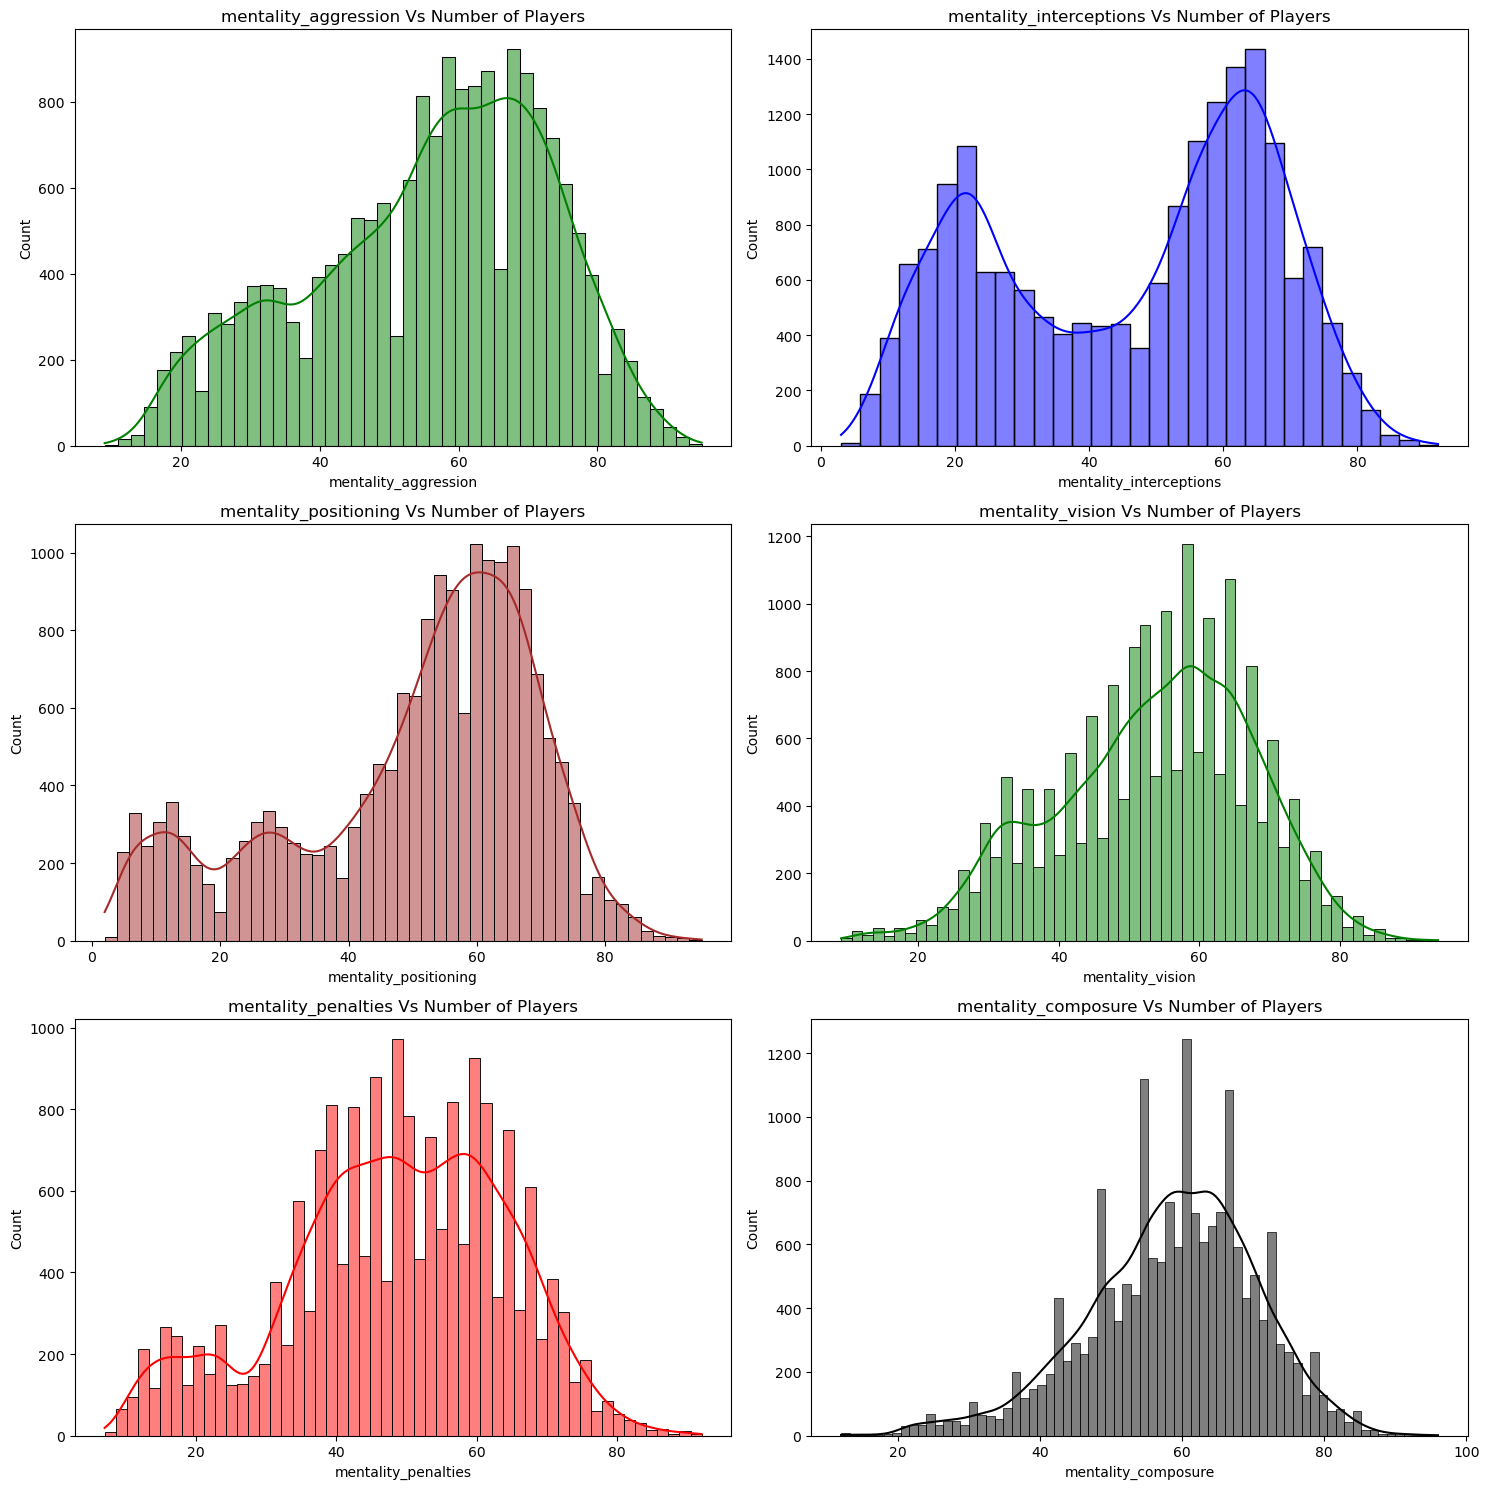

In [33]:
fig,axs = plt.subplots(3,2, figsize = (15,15), dpi=100)

sns.histplot(data=data, x="mentality_aggression", kde=True, color="green",ax=axs[0, 0]).set(title="mentality_aggression Vs Number of Players")
sns.histplot(data=data, x="mentality_interceptions", kde=True, color="blue",ax=axs[0, 1]).set(title="mentality_interceptions Vs Number of Players")
sns.histplot(data=data, x="mentality_positioning", kde=True, color="brown",ax=axs[1, 0]).set(title="mentality_positioning Vs Number of Players")
sns.histplot(data=data, x="mentality_vision", kde=True, color="green",ax=axs[1, 1]).set(title="mentality_vision Vs Number of Players")
sns.histplot(data=data, x="mentality_penalties", kde=True, color="red",ax=axs[2, 0]).set(title="mentality_penalties Vs Number of Players")
sns.histplot(data=data, x="mentality_composure", kde=True, color="black",ax=axs[2, 1]).set(title="mentality_composure Vs Number of Players")
plt.tight_layout()

### Defending Skills of the Players

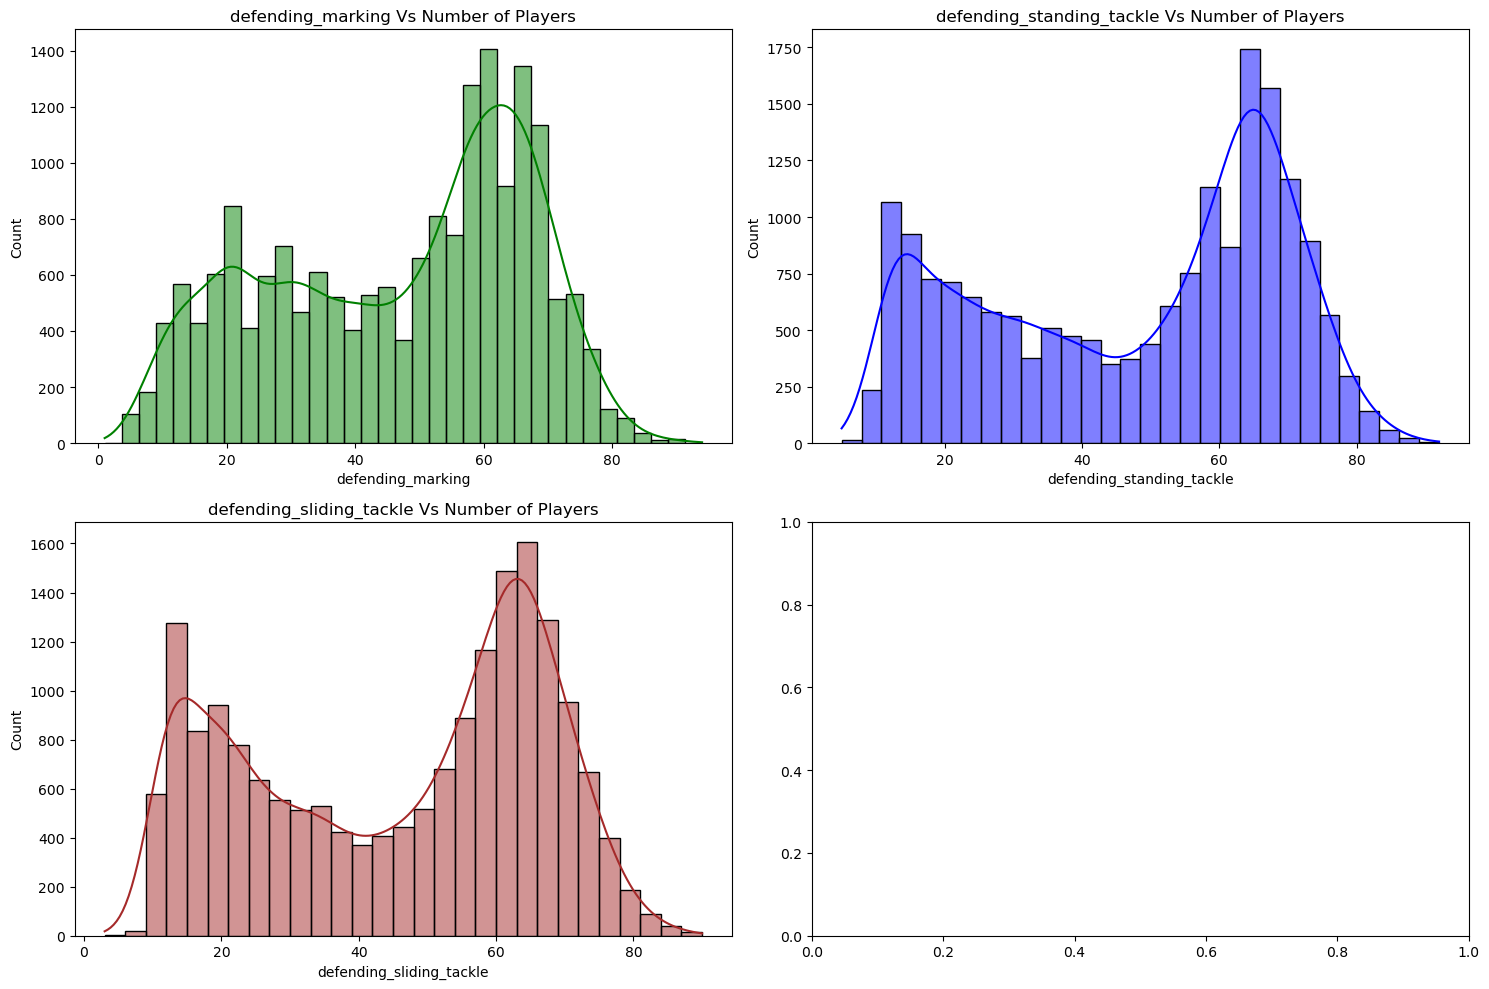

In [34]:
fig,axs = plt.subplots(2,2, figsize = (15,10), dpi=100)

sns.histplot(data=data, x="defending_marking", kde=True, color="green",ax=axs[0, 0]).set(title="defending_marking Vs Number of Players")
sns.histplot(data=data, x="defending_standing_tackle", kde=True, color="blue",ax=axs[0, 1]).set(title="defending_standing_tackle Vs Number of Players")
sns.histplot(data=data, x="defending_sliding_tackle", kde=True, color="brown",ax=axs[1, 0]).set(title="defending_sliding_tackle Vs Number of Players")
plt.tight_layout()

## Bivariate Analysis

### Age v/s Overall Rating and Potential

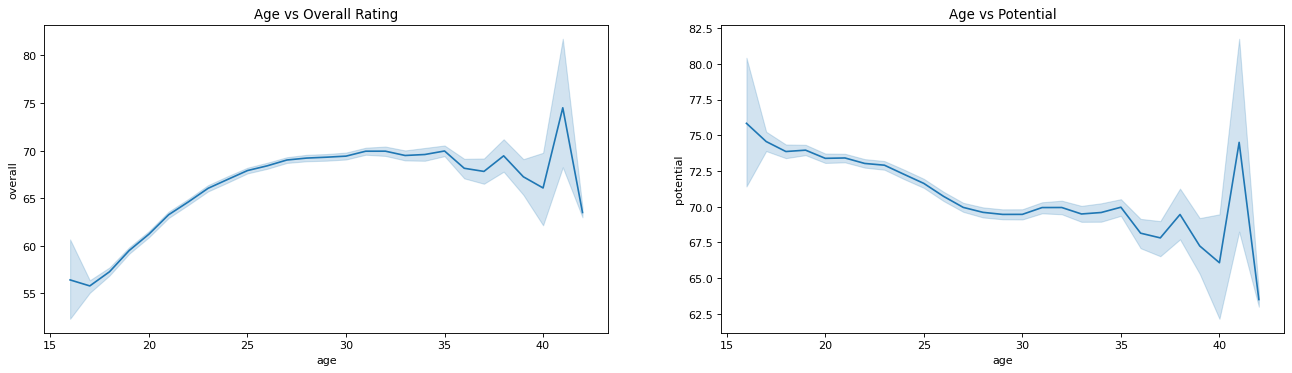

In [35]:
fig, ax = plt.subplots(1,2, figsize=(20,5), dpi = 80)

sns.lineplot('age','overall',data=data,  ax=ax[0]).set(title='Age vs Overall Rating')
sns.lineplot('age', 'potential', data=data, ax=ax[1]).set(title='Age vs Potential')
plt.show()

#### OBSERVATION:

> With increase in Age their is steady rise in Overall Ratings till the age 30. From 30 to 35, it remains nearly constant and thein starts to decline after 35. The Peak above that is shown in the graph is beacuse there are only 4 players aged 41 who have higher ratings.

> With increase in age, the potential seems to be decreasing mildly upto age 35. After age 35, is decreases significantlty. The exception at 41 is beacuse there are only 4 players, out of whom 2 players have above 90 Potential.

### Age v/s Value in Euro and Wage in Euro of players

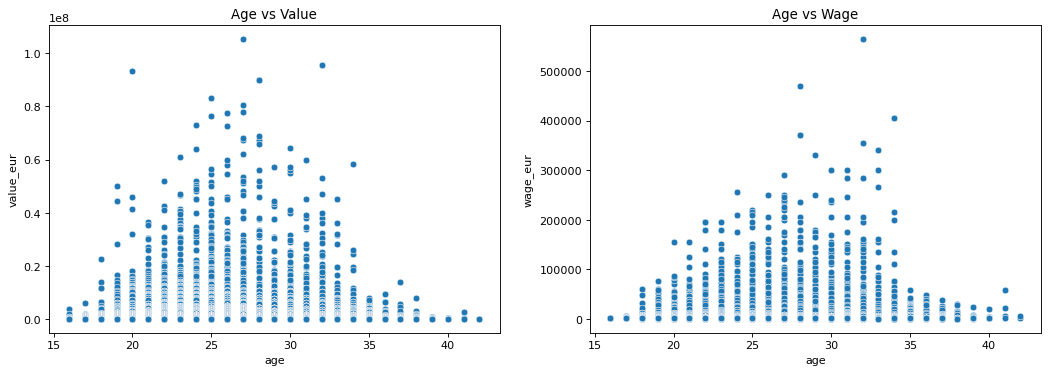

In [36]:
fig, ax = plt.subplots(1,2, figsize=(16,5), dpi = 80)

sns.scatterplot('age','value_eur',data=data,  ax=ax[0]).set(title='Age vs Value')
sns.scatterplot('age', 'wage_eur', data=data, ax=ax[1]).set(title='Age vs Wage')
plt.show()

#### Observation: 
1. The players with age 20 to 34 years has higher value compared to the youngest and higher age players
2. The players with age 20 to 34 years has higher wage in euro compared to the youngest and higher age players

### Value in Euro of players v/s Overall Rating

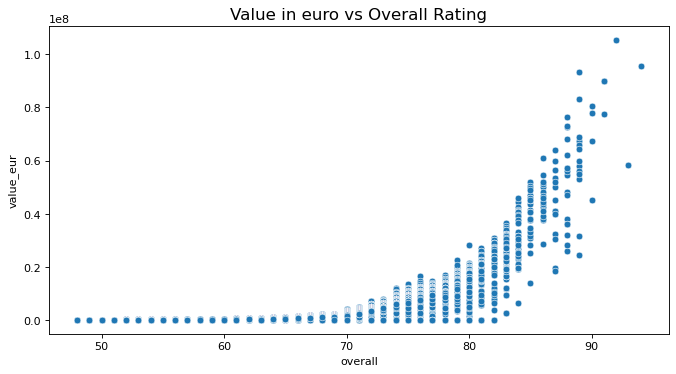

In [37]:
plt.figure(figsize=(10,5), dpi = 80)

sns.scatterplot(x='overall',y='value_eur',data=data)
plt.title('Value in euro vs Overall Rating',fontsize=15)
plt.show()

#### Observation: 
The players value in euro increases with their overall rating.

#### Observation: 
Players with High Reputation are highly Valuable.

### Value in Euro v/s Potential of players

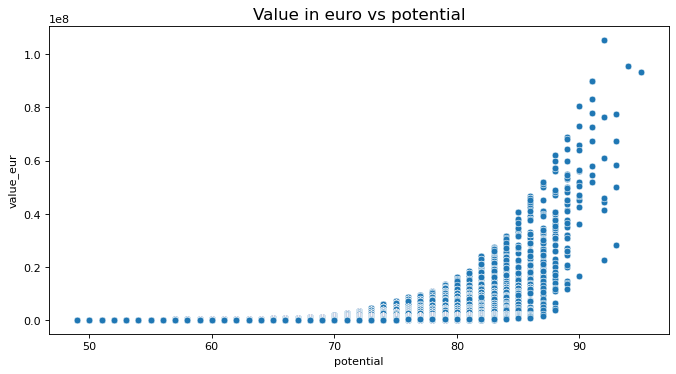

In [38]:
plt.figure(figsize=(10,5), dpi = 80)

sns.scatterplot(x='potential',y='value_eur',data=data)
plt.title('Value in euro vs potential',fontsize=15)
plt.show()

#### Observation: 
Players with High potential are highly Valuable.

In [39]:
int_rep= pd.DataFrame(data['value_eur'].groupby([data['international_reputation']]).mean().sort_values(ascending=False).head(10))
int_rep.rename(columns={"value_eur":"Avg_Value_Eur"}, inplace=True)
int_rep= int_rep.reset_index()

In [40]:
int_rep

international_reputation  Avg_Value_Eur
0                         5   5.975000e+07
1                         4   3.553913e+07
2                         3   2.137428e+07
3                         2   8.571044e+06
4                         1   1.631396e+06

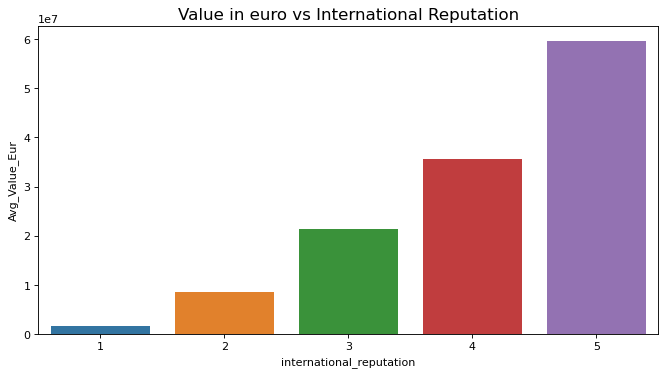

In [41]:
plt.figure(figsize=(10,5), dpi = 80)

sns.barplot(x='international_reputation',y='Avg_Value_Eur',data=int_rep)
plt.title('Value in euro vs International Reputation',fontsize=15)
plt.show()

### Observation:

> Players with highest International Reputation have highest average Value. The value(in Euros) rises with rise in International Reputation Ratings.

### Top 10 Clubs with Highest Wage paid

In [42]:
clubs_wage_eur= pd.DataFrame(data['wage_eur'].groupby([data['club']]).sum().sort_values(ascending=False).head(10))
clubs_wage_eur.rename(columns={"wage_eur":"Total_wage"}, inplace=True)

In [43]:
clubs_wage_eur.reset_index(inplace=True)
clubs_wage_eur

club  Total_wage
0          Real Madrid     5354000
1         FC Barcelona     4950000
2      Manchester City     3984000
3             Juventus     3750000
4    Manchester United     2874000
5              Chelsea     2806000
6            Liverpool     2667000
7    Tottenham Hotspur     2603000
8    FC Bayern München     2516000
9  Paris Saint-Germain     2396000

Text(0.5, 1.0, 'Top 10 Clubs with highest spendings on Wages')

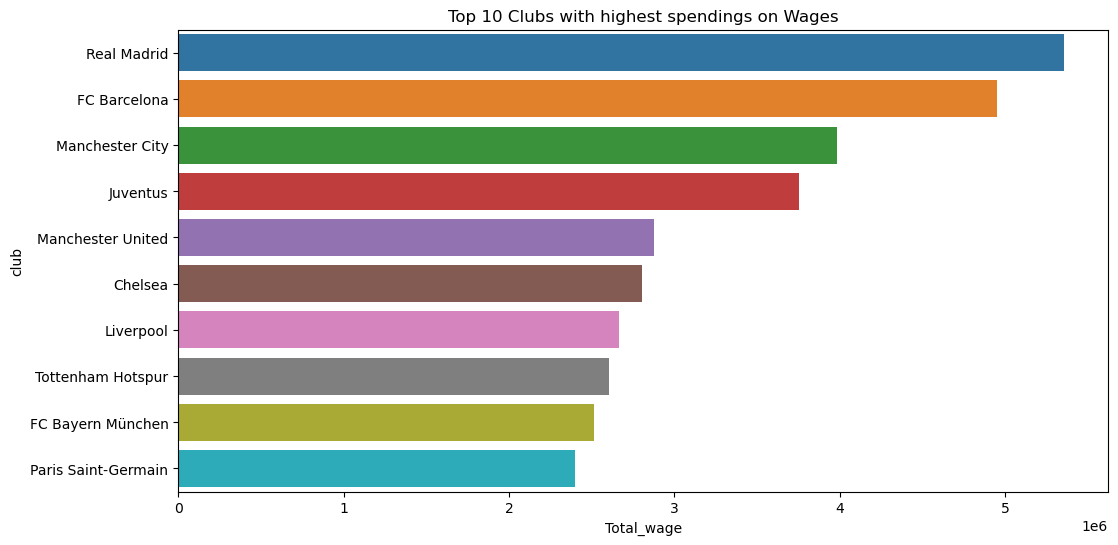

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(y='club', x='Total_wage', data=clubs_wage_eur).set_title('Top 10 Clubs with highest spendings on Wages')

**Observation**

Real Madrid Spends Highest amount on Wages of the players. FC Barcelona and Manchester City come at second and third place respectively.

### Top 10 Clubs with Overall Rating Average

In [45]:
clubs_avg_overall= pd.DataFrame(data['overall'].groupby([data['club']]).mean().sort_values(ascending=False).head(10))
clubs_avg_overall.rename(columns={'overall':'overall_avg'}, inplace=True)

In [46]:
clubs_avg_overall.reset_index(inplace=True)
clubs_avg_overall

club  overall_avg
0    FC Bayern München    81.304348
1          Real Madrid    80.121212
2             Juventus    80.060606
3              Uruguay    78.608696
4         FC Barcelona    78.363636
5               Mexico    78.000000
6          Netherlands    78.000000
7             Colombia    78.000000
8  Bayer 04 Leverkusen    77.280000
9              Chelsea    77.060606

Text(0.5, 1.0, 'Top 10 Clubs with highest average Overall Raitings')

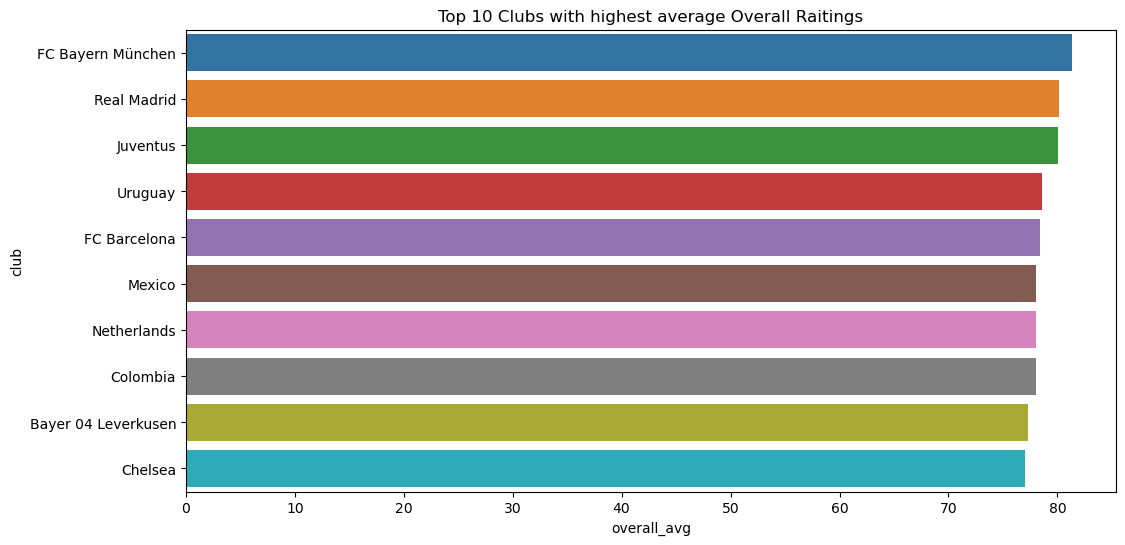

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(y='club', x='overall_avg', data=clubs_avg_overall).set_title('Top 10 Clubs with highest average Overall Raitings')

**Observation**

- FC Bayern Munchen has the highest overall average Rating of 81.3

### Effect of Age, Height and Weight on the Pace Rating of Players

[Text(0.5, 1.0, 'Weight(kg) Vs Pace')]

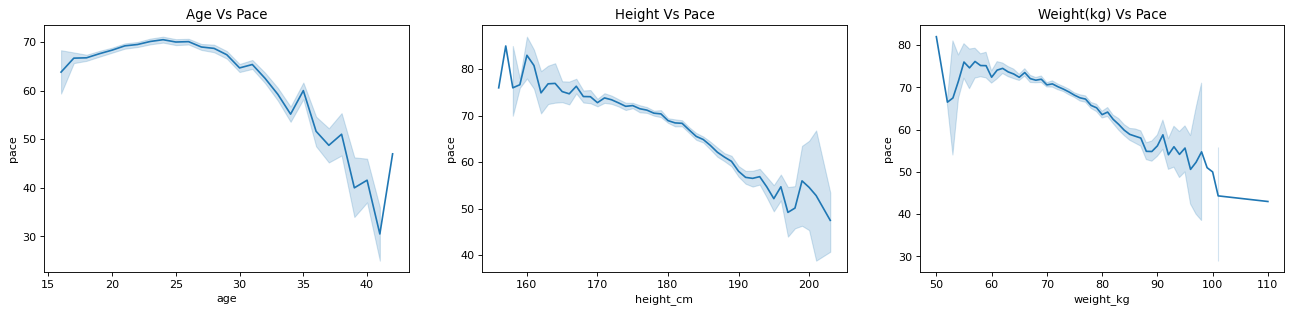

In [48]:
fig, ax = plt.subplots(1,3, figsize=(20, 4), dpi=80)

sns.lineplot(x="age", y='pace', data=data, ax=ax[0]).set(title='Age Vs Pace')
sns.lineplot(x="height_cm", y='pace',data=data, ax=ax[1]).set(title='Height Vs Pace')
sns.lineplot(x="weight_kg", y='pace', data=data, ax=ax[2]).set(title='Weight(kg) Vs Pace')

#### OBSERVATION:

> With increasing Age, Pace shows steep decline in Pace of player 

> Tall players seems to have low pace ratings as compared to short players. With increase in height, pace rating is decreasing.

> Like height, heigher Weight is also affecting pace negatively 

### Effect of Age on Acceleration, Agility and Sprint Speed of the Player.

[Text(0.5, 1.0, 'Age Vs Sprint Speed')]

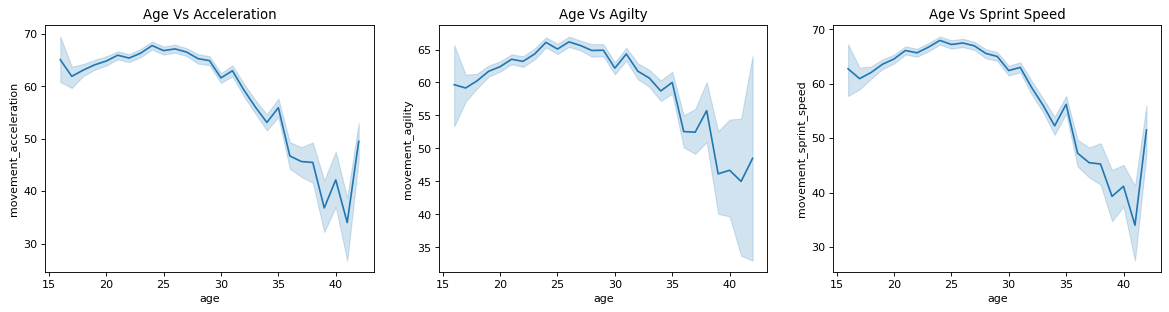

In [49]:
fig, ax = plt.subplots(1,3, figsize=(18, 4), dpi=80)

sns.lineplot(x="age", y='movement_acceleration', data=data, ax=ax[0]).set(title='Age Vs Acceleration')
sns.lineplot(x="age", y='movement_agility', data=data, ax=ax[1]).set(title='Age Vs Agilty')
sns.lineplot(x="age", y='movement_sprint_speed', data=data, ax=ax[2]).set(title='Age Vs Sprint Speed')

#### OBSERVATION:
With the increases in age, Acceleration, Agility and Sprint speed shows a Negative correlation. There is exception at 41 years of age because of the data of only 4 players, which can be neglected.

### Type of Offensive Players ( Striker, Right-Winger and Left-Winger) tends to get paid the most 

In [50]:
# Seperating the Data of Strikers (ST), the Right Wingers(RW) and Left Wingers (LW)

RW=data[data["team_position"] == 'RW']
LW=data[data["team_position"] == 'LW']
ST=data[data["team_position"] == 'ST']

Offensive_list=[RW,ST,LW]  
OP_1=pd.concat(Offensive_list).reset_index(drop=True)  

OP_2= OP_1[['short_name','team_position', 'wage_eur']].sort_values(by='wage_eur', ascending=False).reset_index(drop=True)
OP=OP_2.groupby(by='team_position', as_index=False)

print (OP.count())
print (OP.sum())

  team_position  short_name  wage_eur
0            LW         162       162
1            RW         161       161
2            ST         458       458
  team_position  wage_eur
0            LW   3776000
1            RW   3385000
2            ST   7535000


  team_position  Average Wage
1            LW  23308.641975
2            RW  21024.844720
3            ST  16451.965066


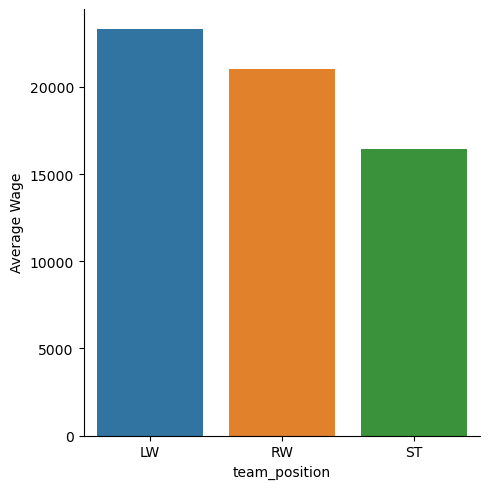

In [51]:
#Average Wage of Offensive Players according to their Postion

Avg_Wage_OP =pd.DataFrame(OP.mean())
Avg_Wage_OP.rename(columns = {"wage_eur":"Average Wage"},  inplace=True)
Avg_Wage_OP.index+=1
print(Avg_Wage_OP)

# Displaying barplot of the players with their average wage

sns.catplot(data=Avg_Wage_OP, x="team_position", y="Average Wage", kind="bar")
plt.show()

#### OBSERVATION:
> Out of Three types of Offensive Players, Left Wingers are paid the Most with average earning of 23,308 Euros. 

> Right Wingers are at the 2nd place with average earning of 21,024 Euros and Strikers come at 3rd place with average earning of 16,451 Euros

### Overall Rating vs Work Rate of the Players

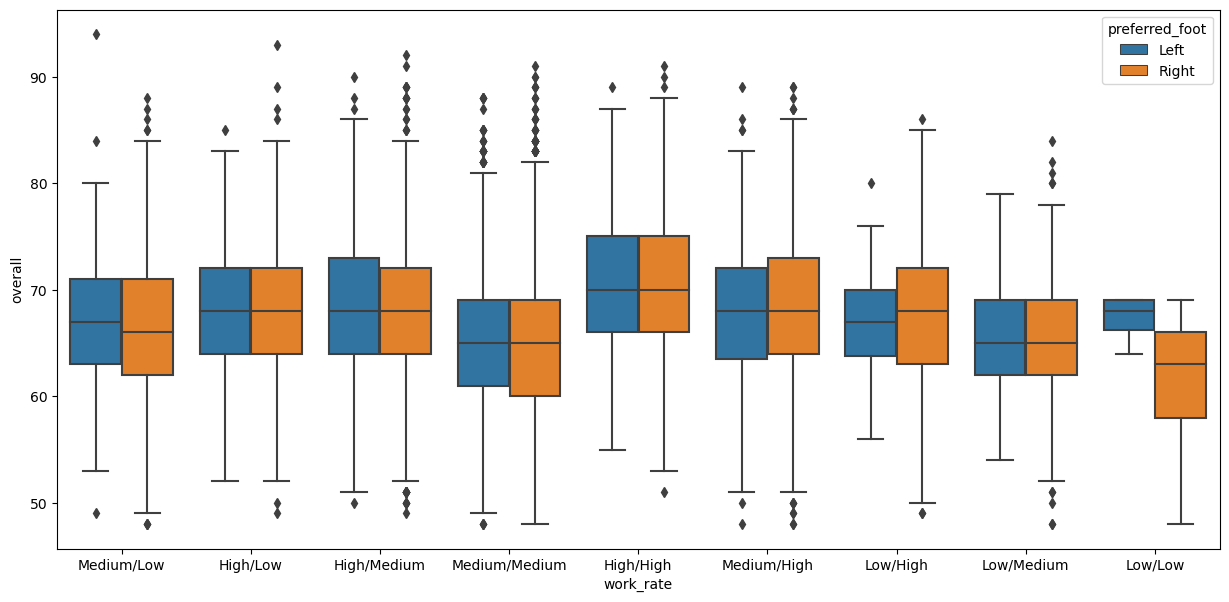

In [52]:
plt.figure(figsize=(15,7))

sns.boxplot(x='work_rate',y='overall',data=data,hue='preferred_foot')
plt.show()

#### OBSERVATION:

1. If player's attack/defence work rate is  High/High then there is no difference in player's rating, if they prefer right or left foot.

2. If player's attack/defence work rate is  High/Medium then their potential is slightly higher in casse if they prefer left foot than right foot in game.

3. If player's attact/defence work rate is Medium/High and Low/High then their potential is slightly higher in case if they prefer right foot than left foot in game.


###  Potential of the Players with skill moves vs weak foot

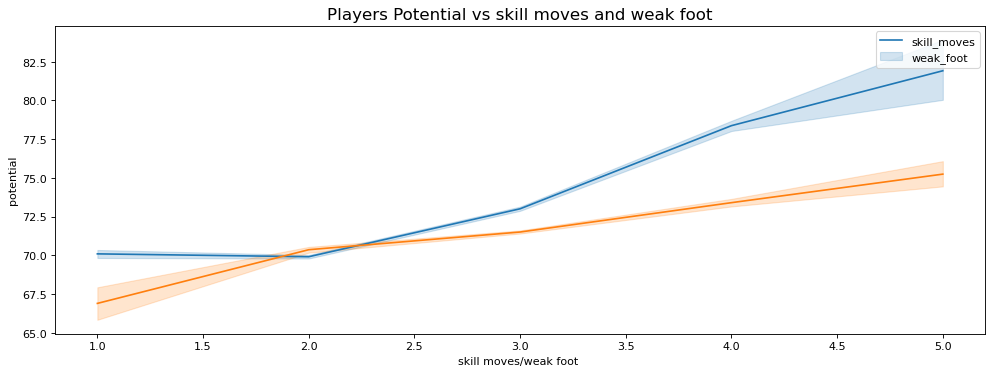

In [53]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='skill_moves',y='potential',data=data)
sns.lineplot(x='weak_foot',y='potential',data=data)

plt.xlabel('skill moves/weak foot ')
plt.title('Players Potential vs skill moves and weak foot',fontsize=15)
plt.legend(['skill_moves','weak_foot'])
plt.show()

#### OBSERVATION:
The players will have high potential if they improve their skill moves rather than their weak foot 

### Potential of the Players with their attacking skills

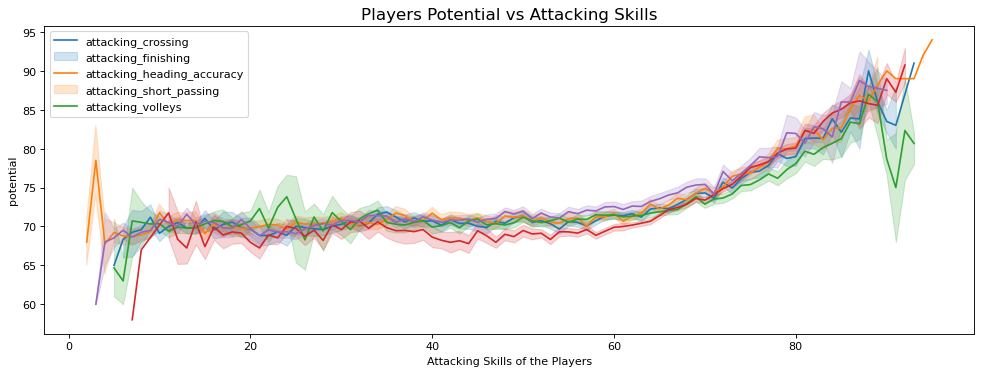

In [54]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='attacking_crossing',y='potential',data=data)
sns.lineplot(x='attacking_finishing',y='potential',data=data)
sns.lineplot(x='attacking_heading_accuracy',y='potential',data=data)
sns.lineplot(x='attacking_short_passing',y='potential',data=data)
sns.lineplot(x='attacking_volleys',y='potential',data=data)

plt.xlabel('Attacking Skills of the Players')
plt.title('Players Potential vs Attacking Skills',fontsize=15)
plt.legend(['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys'])
plt.show()

#### Observation:
1. Players have a constant potential with their attacking skills of 60 and below. 
2. Players with a potential of 70 above shows a steady increase in their attacking skills.

### Potential of the Players with their Skills with the football

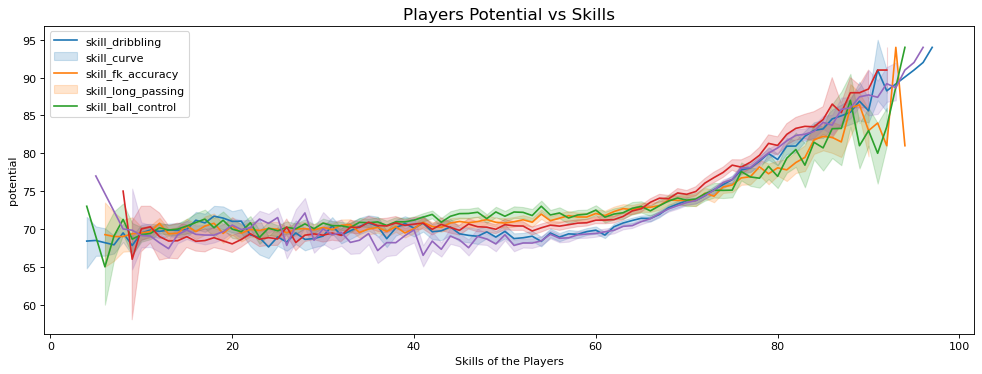

In [55]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='skill_dribbling',y='potential',data=data)
sns.lineplot(x='skill_curve',y='potential',data=data)
sns.lineplot(x='skill_fk_accuracy',y='potential',data=data)
sns.lineplot(x='skill_long_passing',y='potential',data=data)
sns.lineplot(x='skill_ball_control',y='potential',data=data)

plt.xlabel('Skills of the Players')
plt.title('Players Potential vs Skills',fontsize=15)
plt.legend(['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control'])
plt.show()

#### Observation:
1. Players have a constant potential with their skill of 60 and below. 
2. Players with a potential of 70 above shows a steady increase in their skills with the ball.

### Potential of the Players with their Movement Skills 

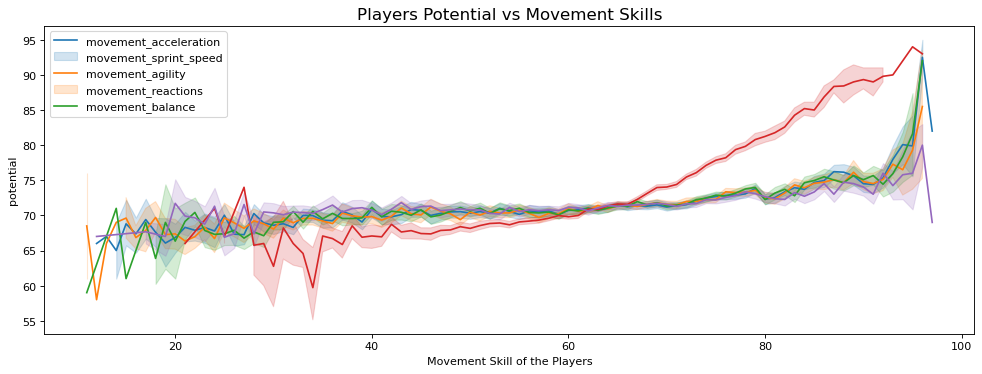

In [56]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='movement_acceleration',y='potential',data=data)
sns.lineplot(x='movement_sprint_speed',y='potential',data=data)
sns.lineplot(x='movement_agility',y='potential',data=data)
sns.lineplot(x='movement_reactions',y='potential',data=data)
sns.lineplot(x='movement_balance',y='potential',data=data)

plt.xlabel('Movement Skill of the Players')
plt.title('Players Potential vs Movement Skills',fontsize=15)
plt.legend(['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance'])
plt.show()

#### Observation:
1. Players have a constant potential with their movement skills. 
2. Players with a potential of 70 show an increase in their movement reaction as compared to their other movement skills.

### Potential of the Players with their Power Skills

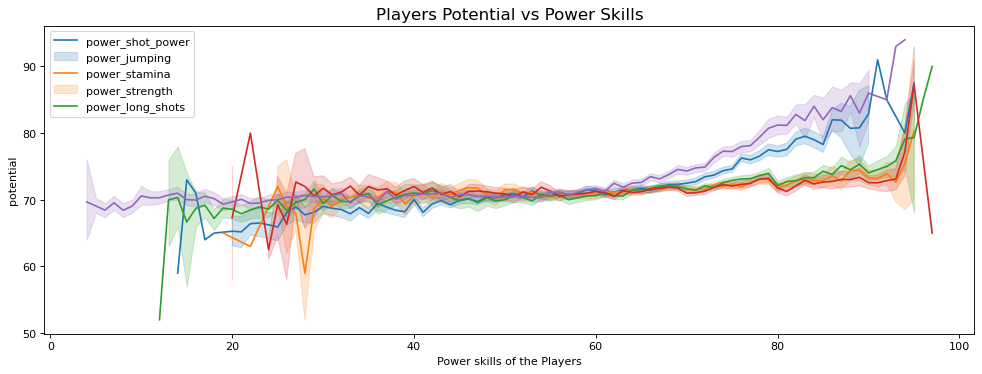

In [57]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='power_shot_power',y='potential',data=data)
sns.lineplot(x='power_jumping',y='potential',data=data)
sns.lineplot(x='power_stamina',y='potential',data=data)
sns.lineplot(x='power_strength',y='potential',data=data)
sns.lineplot(x='power_long_shots',y='potential',data=data)

plt.xlabel('Power skills of the Players')
plt.title('Players Potential vs Power Skills',fontsize=15)
plt.legend(['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots'])
plt.show()

#### Observation:
1. Players has a constant potential with their power skills.
2. Players with a potential of 70 above shows a steady increase in their power shot and power long shot skills compared to other power skills.

### Potential of the Players with their Mentality Skills

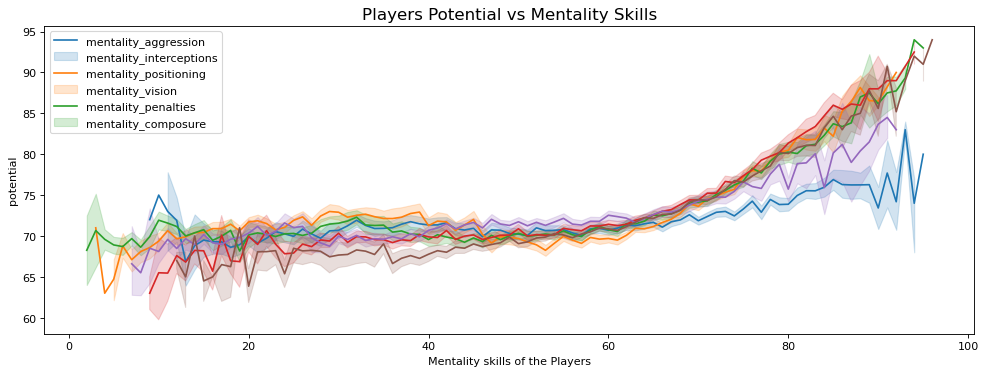

In [58]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='mentality_aggression',y='potential',data=data)
sns.lineplot(x='mentality_interceptions',y='potential',data=data)
sns.lineplot(x='mentality_positioning',y='potential',data=data)
sns.lineplot(x='mentality_vision',y='potential',data=data)
sns.lineplot(x='mentality_penalties',y='potential',data=data)
sns.lineplot(x='mentality_composure',y='potential',data=data)

plt.xlabel('Mentality skills of the Players')
plt.title('Players Potential vs Mentality Skills',fontsize=15)
plt.legend(['mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure'])
plt.show()

#### Observation:
1. Players has a constant potential with their skill of 60 and below. 
2. Players with a potential of 60 above shows a steady increase in their mentality skills.

### Potential of the Players with their Defending Skills

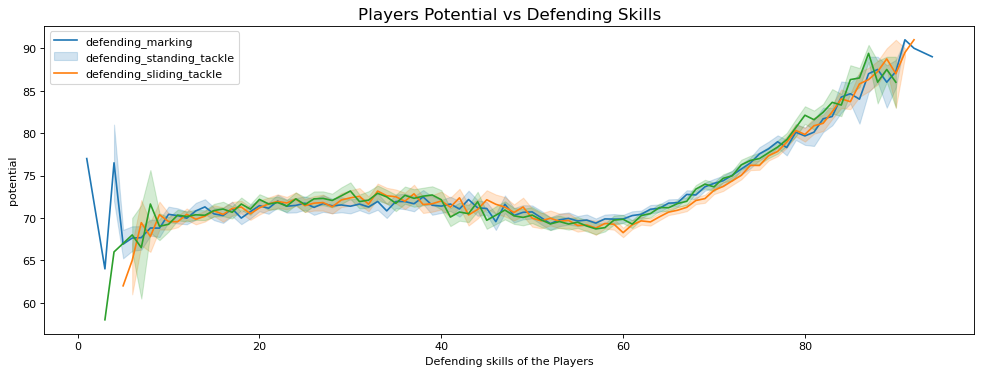

In [59]:
plt.figure(figsize = (15, 5), dpi = 80)

sns.lineplot(x='defending_marking',y='potential',data=data)
sns.lineplot(x='defending_standing_tackle',y='potential',data=data)
sns.lineplot(x='defending_sliding_tackle',y='potential',data=data)

plt.xlabel('Defending skills of the Players')
plt.title('Players Potential vs Defending Skills',fontsize=15)
plt.legend(['defending_marking','defending_standing_tackle','defending_sliding_tackle'])
plt.show()

###### Observation:
1. Players has a constant potential with their skill of 60 and below. 
2. Players with a potential of 60 above shows a steady increase in their defending skills.